In [19]:
import numpy as np
import pandas as pd
import scipy.interpolate
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
%matplotlib notebook


# Testing

In [22]:
x_sdf = np.linspace(0, 1, 500)
y_sdf = np.linspace(0, 1, 500)

In [23]:
grid_x_1, grid_y_1 = np.meshgrid(x_sdf, y_sdf)
grid_x_2, grid_y_2 = np.mgrid[0:1:10j, 0:1:20j]

In [24]:
points = np.random.rand(200, 2)
points

array([[7.38200013e-01, 8.26765150e-01],
       [1.76573856e-01, 8.19216884e-01],
       [4.75328111e-01, 3.02428015e-01],
       [7.57750509e-01, 4.79220946e-01],
       [1.96096568e-01, 4.94018825e-01],
       [5.35530552e-01, 3.80325385e-01],
       [5.67843349e-01, 2.55444148e-01],
       [8.62807443e-01, 4.27953570e-01],
       [6.18153550e-01, 4.07030526e-02],
       [5.95823295e-01, 2.48199149e-01],
       [9.20402218e-01, 1.31364272e-01],
       [9.16201394e-01, 2.04680614e-01],
       [9.29883376e-01, 5.01089617e-03],
       [3.76623663e-01, 7.80037403e-01],
       [8.51069421e-01, 1.93673979e-01],
       [7.88901412e-01, 4.23322870e-01],
       [4.25813118e-01, 7.16952232e-01],
       [7.59261684e-01, 4.77226025e-01],
       [6.99034523e-01, 2.56058450e-01],
       [1.30234560e-01, 1.82151797e-01],
       [1.15723904e-01, 9.50775724e-01],
       [4.45059928e-01, 2.00697641e-01],
       [4.17841668e-01, 6.13706050e-02],
       [2.69601072e-01, 6.28903605e-02],
       [2.344550

In [25]:
values = np.random.rand(200, 1)
values

array([[0.74614169],
       [0.27446307],
       [0.97836349],
       [0.04605077],
       [0.73078913],
       [0.98208078],
       [0.40008493],
       [0.64348075],
       [0.52535323],
       [0.70115449],
       [0.09238515],
       [0.43845344],
       [0.73369184],
       [0.55976832],
       [0.33013255],
       [0.86601493],
       [0.7521026 ],
       [0.07187701],
       [0.568706  ],
       [0.2758286 ],
       [0.49340541],
       [0.93488962],
       [0.44702202],
       [0.41814269],
       [0.84130239],
       [0.40343104],
       [0.30323903],
       [0.151404  ],
       [0.73018596],
       [0.71731244],
       [0.56755696],
       [0.89734861],
       [0.0191161 ],
       [0.7347664 ],
       [0.69465091],
       [0.87236917],
       [0.13087583],
       [0.67951778],
       [0.69291384],
       [0.94484256],
       [0.88240489],
       [0.85712856],
       [0.31477688],
       [0.44814464],
       [0.45350822],
       [0.07357741],
       [0.52875279],
       [0.669

In [35]:
grid_1 = scipy.interpolate.griddata(points, values, (grid_x_1, grid_y_1), method='linear')

In [2]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib notebook

In [10]:
grid_1.shape

(100, 100, 1)

In [36]:
grid_1_lin = np.nan_to_num(grid_1, nan=0.5)

<IPython.core.display.Javascript object>


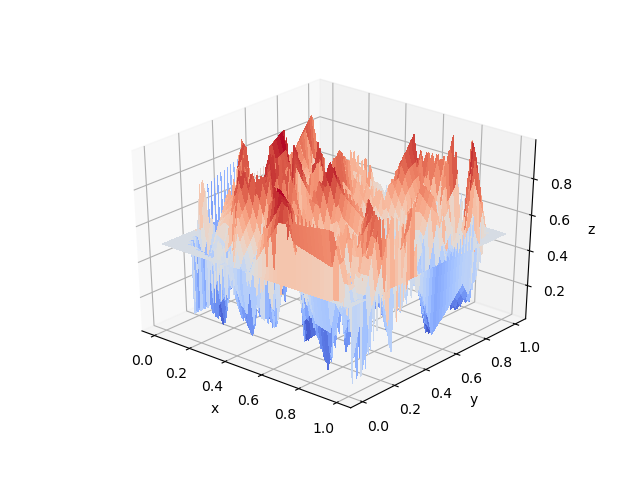

In [37]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
surf = ax.plot_surface(grid_x_1, grid_y_1, grid_1_lin.T[0], cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

In [13]:
grid_1.T[0].shape

(100, 100)

In [14]:
np.array([[1, 1 ], [1, 1]], []).shape

(2, 2)

In [15]:
test = np.array([[1, 1]])
np.vstack((test, np.array([2,2])))


array([[1, 1],
       [2, 2]])

In [16]:
test = np.empty((0,2), float)
np.vstack((test, np.array([1, 1])))

array([[1., 1.]])

# Zoom

In [2]:
def zoom(array, hyp1_linspace, hyp2_linspace, hyp1_type="float", hyp2_type="float"):
    sorted_values = np.sort(array, axis=None)
    fifty_percent_lowest_values = sorted_values[:round(len(sorted_values)/2)]
    
    x_range, y_range = array.shape
    
    x_first = None
    x_last = None

    for x in range(x_range):
        if (x_first == None) and (np.amin(array[x]) in fifty_percent_lowest_values):
            x_first = x
            x_last = x
        elif (x_first != None) and (np.amin(array[x]) in fifty_percent_lowest_values):
            x_last = x
    
    x_extracted = array[x_first:x_last+1]
    
    y_first = None
    y_last = None
    
    for y in range(y_range):
        if (y_first == None) and (np.amin(x_extracted[:, y]) in fifty_percent_lowest_values):
            y_first = y
            y_last = y
        elif (y_first != None) and (np.amin(x_extracted[:, y]) in fifty_percent_lowest_values):
            y_last = y
    
    if hyp1_type == "int":
        new_hyp1_linspace = np.linspace(hyp1_linspace[y_first], hyp1_linspace[y_last], 50, dtype=int)
    else:
        new_hyp1_linspace = np.linspace(hyp1_linspace[y_first], hyp1_linspace[y_last], 50)
        
    if hyp2_type == "int":
        new_hyp2_linspace = np.linspace(hyp2_linspace[x_first], hyp2_linspace[x_last], 50, dtype=int)
    else: 
        new_hyp2_linspace = np.linspace(hyp2_linspace[x_first], hyp2_linspace[x_last], 50)
    
    new_hyp1_mesh, new_hype2_mesh = np.meshgrid(new_hyp1_linspace, new_hyp2_linspace)
    
    zoomed_array = x_extracted[:, y_first:y_last+1]
    
    return (new_hyp1_linspace, new_hyp2_linspace, new_hyp1_mesh, new_hype2_mesh)

In [3]:
def zoom(array, hyp1_linspace, hyp2_linspace, hyp1_type="float", hyp2_type="float"):
    sorted_values = np.sort(array, axis=None)
    fifty_percent_lowest_values = sorted_values[:round(len(sorted_values)/2)]
    
    x_range, y_range = array.shape
    
    x_first = None
    x_last = None

    for x in range(x_range):
        if (x_first == None) and (np.amin(array[x]) in fifty_percent_lowest_values):
            x_first = x
            x_last = x
        elif (x_first != None) and (np.amin(array[x]) in fifty_percent_lowest_values):
            x_last = x
    
    x_extracted = array[x_first:x_last+1]
    
    y_first = None
    y_last = None
    
    for y in range(y_range):
        if (y_first == None) and (np.amin(x_extracted[:, y]) in fifty_percent_lowest_values):
            y_first = y
            y_last = y
        elif (y_first != None) and (np.amin(x_extracted[:, y]) in fifty_percent_lowest_values):
            y_last = y
    
    if hyp1_type == "int":
        new_hyp1_linspace = np.linspace(hyp1_linspace[y_first], hyp1_linspace[y_last], 50, dtype=int)
    else:
        new_hyp1_linspace = np.linspace(hyp1_linspace[y_first], hyp1_linspace[y_last], 50)
        
    if hyp2_type == "int":
        new_hyp2_linspace = np.linspace(hyp2_linspace[x_first], hyp2_linspace[x_last], 50, dtype=int)
    else: 
        new_hyp2_linspace = np.linspace(hyp2_linspace[x_first], hyp2_linspace[x_last], 50)
    
    new_hyp1_mesh, new_hype2_mesh = np.meshgrid(new_hyp1_linspace, new_hyp2_linspace)
    
    zoomed_array = x_extracted[:, y_first:y_last+1]
    
    return (new_hyp1_linspace, new_hyp2_linspace, new_hyp1_mesh, new_hype2_mesh)

In [4]:
def zoom_2(surface, mesh_1, mesh_2, percentage=0.5, resolution=50, htype1="float", htype2="float", sort_dir="asc"):
    values = surface.ravel()
    coord_1 = mesh_1.ravel()
    coord_2 = mesh_2.ravel()
    
    points = np.array([values, coord_1, coord_2])
    points = points.transpose()
    
    if sort_dir == "asc":
        sorted_points = points[points[:,0].argsort()]
    else:
        sorted_points = points[points[:,0].argsort()[::-1]]
    
    best_values = sorted_points[:round(len(sorted_points)*percentage)]
    
    coord_1_min = best_values[:,1].min()
    coord_1_max = best_values[:,1].max()
    
    coord_2_min = best_values[:,2].min()
    coord_2_max = best_values[:,2].max()
    
    if htype1 == "float":
        new_range_1 = np.linspace(coord_1_min, coord_1_max, resolution)
    else:
        new_range_1 = np.linspace(coord_1_min, coord_1_max, resolution, dtype=int)
        
    if htype2 == "float":
        new_range_2 = np.linspace(coord_2_min, coord_2_max, resolution)
    else:
        new_range_2 = np.linspace(coord_2_min, coord_2_max, resolution, dtype=int)
        
    new_mesh_1, new_mesh_2 = np.meshgrid(new_range_1, new_range_2)
    
    return (new_range_1, new_range_2, new_mesh_1, new_mesh_2)

# Interpolate

In [5]:
#arrays is an array containing an arbitrary number of 2d arrays
#meshes is an array containing tuples of meshgrids. has to be the same length as arrays and same position as correlated arrays
def interpolate(out_par_1_lin, out_par_2_lin, arrays, meshes):
    method_points = np.empty((0,2), float)
    method_values = np.empty((0,1), float)
    
    par_1_mesh, par_2_mesh = np.meshgrid(out_par_1_lin, out_par_2_lin)

    for a in range(len(arrays)):
        array = arrays[a]
        m1, m2 = meshes[a]
        for x in range(array.shape[0]):
            for y in range(array.shape[1]):
                method_points = np.vstack((method_points, np.array([m1[x,y], m2[x,y]])))
                method_values = np.vstack((method_values, np.array([array[x,y]])))
                
    output_grid = scipy.interpolate.griddata(method_points, method_values, (par_1_mesh, par_2_mesh), method="cubic")
    return (output_grid.T[0].T, par_1_mesh, par_2_mesh)

def interpolate_lin(out_par_1_lin, out_par_2_lin, arrays, meshes):
    method_points = np.empty((0,2), np.float)
    method_values = np.empty((0,1), np.float)
    
    par_1_mesh, par_2_mesh = np.meshgrid(out_par_1_lin, out_par_2_lin)
    
    par_1_mesh = par_1_mesh[:].astype(float)
    par_2_mesh = par_2_mesh[:].astype(float)

    for a in range(len(arrays)):
        array = arrays[a]
        m1, m2 = meshes[a]
        m1 = m1[:].astype(float)
        m2= m2[:].astype(float)
        for x in range(array.shape[0]):
            for y in range(array.shape[1]):
                method_points = np.vstack((method_points, np.array([m1[x,y], m2[x,y]])))
                method_values = np.vstack((method_values, np.array([array[x,y]])))
                
    method_points = method_points[:].astype(float)
    
    xscale = np.max(out_par_1_lin) - np.min(out_par_1_lin)
    yscale = np.max(out_par_2_lin) - np.min(out_par_2_lin)
    
    scale = np.array([xscale, yscale])
                
    output_grid = scipy.interpolate.griddata(method_points/scale, method_values, (par_1_mesh/xscale, par_2_mesh/yscale), method="linear")
    return (output_grid.T[0].T, par_1_mesh, par_2_mesh)

def interpolate_ass(out_par_1_lin, out_par_2_lin, arrays, meshes):
    method_points = np.empty((0,2), np.float)
    method_values = np.empty((0,1), np.float)
    
    par_1_mesh, par_2_mesh = np.meshgrid(out_par_1_lin, out_par_2_lin)
    

    for a in range(len(arrays)):
        array = arrays[a]
        m1, m2 = meshes[a]
        m1 = m1[:].astype(np.float)
        m2= m2[:].astype(np.float)
        for x in range(array.shape[0]):
            for y in range(array.shape[1]):
                if np.array([m1[x,y], m2[x,y]]).tolist() not in method_points.tolist():
                    method_points = np.vstack((method_points, np.array([m1[x,y], m2[x,y]])))
                    method_values = np.vstack((method_values, np.array([array[x,y]])))
                
    method_points = method_points[:].astype(np.float)
    par_1_mesh = par_1_mesh[:].astype(np.float)
    par_2_mesh = par_2_mesh[:].astype(np.float)
    
    xmin = np.min(par_1_mesh)
    ymin = np.min(par_2_mesh)
    
    xscale = np.max(par_1_mesh) - np.min(par_1_mesh)
    yscale = np.max(par_2_mesh) - np.min(par_2_mesh)
    
    dunno = np.array([np.min(par_1_mesh), np.min(par_2_mesh)])
    
    scale = np.array([xscale, yscale])
    
    value_scale = np.max(method_values) - np.min(method_values)
                
    output_grid = scipy.interpolate.griddata((method_points-dunno)/scale, method_values, ((par_1_mesh-xmin)/xscale, (par_2_mesh-ymin)/yscale), method="linear", rescale=True)
    return (output_grid.T[0].T, par_1_mesh, par_2_mesh)


def interpolate_lin_scale(out_par_1_lin, out_par_2_lin, arrays, meshes):
    method_points = np.empty((0,2, float))
    method_values = np.empty((0,1, float))
    
    par_1_mesh, par_2_mesh = np.meshgrid(out_par_1_lin, out_par_2_lin)

    for a in range(len(arrays)):
        array = arrays[a]
        m1, m2 = meshes[a]
        for x in range(array.shape[0]):
            for y in range(array.shape[1]):
                method_points = np.vstack((method_points, np.array([m1[x,y], m2[x,y]])))
                method_values = np.vstack((method_values, np.array([array[x,y]])))
                
    xscale = np.max(out_par_1_lin) - np.min(out_par_1_lin)
    yscale = np.max(out_par_2_lin) - np.min(out_par_2_lin)
    
    scale = np.array([xscale, yscale])
                
    output_grid = scipy.interpolate.griddata(method_points/scale, method_values, (par_1_mesh/xscale, par_2_mesh/yscale), method="linear", rescale=True)
    return (output_grid.T[0].T, par_1_mesh, par_2_mesh)



In [6]:
def comb_mesh(meshes, comb=1):
    
    comb1_mesh, comb2_mesh, comb3_mesh, comb4_mesh, comb5_mesh, comb6_mesh = meshes
    
    if comb == 1:
        return comb1_mesh
    elif comb == 2:
        return comb2_mesh
    elif comb == 3:
        return comb3_mesh
    elif comb == 4:
        return comb4_mesh
    elif comb == 5:
        return comb5_mesh
    elif comb == 6:
        return comb5_mesh

In [7]:
def generate_meshgrids(ranges):
    
    learning_rate_range, n_estimators_range, max_depth_range, reg_lamda_range = ranges
    
    comb1_m1, comb1_m2 = np.meshgrid(learning_rate_range, n_estimators_range)
    comb2_m1, comb2_m2 = np.meshgrid(learning_rate_range, max_depth_range)
    comb3_m1, comb3_m2 = np.meshgrid(learning_rate_range, reg_lamda_range)
    comb4_m1, comb4_m2 = np.meshgrid(n_estimators_range, max_depth_range)
    comb5_m1, comb5_m2 = np.meshgrid(n_estimators_range, reg_lamda_range)
    comb6_m1, comb6_m2 = np.meshgrid(max_depth_range, reg_lamda_range)
    
    comb1_meshes = (comb1_m1, comb1_m2)
    comb2_meshes = (comb2_m1, comb2_m2)
    comb3_meshes = (comb3_m1, comb3_m2)
    comb4_meshes = (comb4_m1, comb4_m2)
    comb5_meshes = (comb5_m1, comb5_m2)
    comb6_meshes = (comb6_m1, comb6_m2)
    
    meshes = (comb1_meshes, comb2_meshes, comb3_meshes, comb4_meshes, comb5_meshes, comb6_meshes)
    
    return meshes

In [8]:
def visualize_interp(surface, m1, m2, divided_by, lwidth, comb=1, dataset_type="class"):
    
    #Checks input
    possible_combs = [1, 2, 3, 4, 5, 6]
    if (comb not in possible_combs):
        print("Specified combination number is not supported by the algorithm.")
        return
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    
    if dataset_type == "class":
        ax.set_zlabel("Accuracy")
    else:
        ax.set_zlabel("MAE")
        
    
    if comb == 1:
        ax.set_xlabel("learning_rate")
        ax.set_ylabel("n_estimators")
    elif comb == 2:
        ax.set_xlabel("learning_rate")
        ax.set_ylabel("max_depth")
    elif comb == 3:
        ax.set_xlabel("learning_rate")
        ax.set_ylabel("reg_lamda")
    elif comb == 4:
        ax.set_xlabel("n_estimators")
        ax.set_ylabel("max_depth")
    elif comb == 5:
        ax.set_xlabel("n_estimators")
        ax.set_ylabel("reg_lamda")
    elif comb == 6:
        ax.set_xlabel("max_depth")
        ax.set_ylabel("reg_lamda")
        
    ax.plot_surface(m1, m2, surface, cmap=cm.RdYlBu,
                       linewidth=0, antialiased=False, rstride=1, cstride=1)
    
    x_axis, y_axis = np.where(surface == np.max(surface))
    
    ax.plot([m1[x_axis[0], y_axis[0]],m1[x_axis[0], y_axis[0]]],
       [m2[x_axis[0], y_axis[0]], m2[x_axis[0], y_axis[0]]],
       [np.max(surface), np.max(surface - (np.max(surface)/divided_by))], c="red", zorder=3.5, linewidth=lwidth)

In [5]:
learning_rate_temp = np.linspace(0.0,2.0,100)
n_estimators_temp = np.linspace(1,500,100, dtype=int)

test_arrays = np.array([soybean_xgb_comb1_error, soybean_xgb_comb1_zoom1_error])
test_meshes = np.array([(learning_rate_comb1, n_estimators_comb1), 
                        (soybean_learning_rate_comb1_zoom1_mesh, soybean_n_estimators_comb1_zoom1_mesh)])

test_grid, test_mesh_1, test_mesh_2 = interpolate(learning_rate_temp, n_estimators_temp, test_arrays, test_meshes)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("learning_rate")
ax.set_ylabel("n_estimators")
ax.set_zlabel("Error")
surf = ax.plot_surface(test_mesh_1, test_mesh_2,
                       test_grid, 
                       cmap=cm.coolwarm, linewidth=0, antialiased=False)

NameError: name 'soybean_xgb_comb1_error' is not defined

# Soybean

In [52]:
learning_rate = np.linspace(0.0,2.0,20)
n_estimators = np.linspace(1,500,20, dtype=int)
max_depth = np.linspace(1,35,20, dtype=int)
reg_lamda = np.linspace(0.0, 2.0, 20)

soybean_ranges = (learning_rate, n_estimators, max_depth, reg_lamda)

learning_rate_comb1, n_estimators_comb1 = np.meshgrid(learning_rate, n_estimators)
learning_rate_comb2, max_depth_comb2 = np.meshgrid(learning_rate, max_depth)
learning_rate_comb3, reg_lamda_comb3 = np.meshgrid(learning_rate, reg_lamda)

n_estimators_comb4, max_depth_comb4 = np.meshgrid(n_estimators, max_depth)
n_estimators_comb5, reg_lamda_comb5 = np.meshgrid(n_estimators, reg_lamda)

max_depth_comb6, reg_lamda_comb6 = np.meshgrid(max_depth, reg_lamda)

soybean_meshes = generate_meshgrids(soybean_ranges)


In [10]:
soybean_learning_rate = np.linspace(0.0,2.0,20)
soybean_n_estimators = np.linspace(1,500,20, dtype=int)
soybean_max_depth = np.linspace(1,35,20, dtype=int)
soybean_reg_lamda = np.linspace(0.0, 2.0, 20)

soybean_ranges = (soybean_learning_rate, soybean_n_estimators, soybean_max_depth, soybean_reg_lamda)

soybean_meshes = generate_meshgrids(soybean_ranges)

## Soybean Comb 1

In [15]:
soybean_xgb_comb1_error = np.load(".\\np_arrays\\soybean_xgb_comb1_error.npy")
soybean_xgb_comb1_error.shape

(20, 20)

In [16]:
soybean_xgb_comb1_zoom1_error = np.load(".\\np_arrays_50\\soybean_xgb_comb1_zoom1_error_50.npy")
soybean_xgb_comb1_zoom1_error.shape

(50, 50)

In [17]:
soybean_learning_rate_comb1_zoom1_lin, soybean_n_estimators_comb1_zoom1_lin, soybean_learning_rate_comb1_zoom1_mesh, soybean_n_estimators_comb1_zoom1_mesh = zoom(soybean_xgb_comb1_error, learning_rate, n_estimators, "float", "int")

(soybean_learning_rate_comb1_zoom1_lin, soybean_n_estimators_comb1_zoom1_lin)

(array([0.10526316, 0.14393126, 0.18259936, 0.22126745, 0.25993555,
        0.29860365, 0.33727175, 0.37593985, 0.41460795, 0.45327605,
        0.49194415, 0.53061224, 0.56928034, 0.60794844, 0.64661654,
        0.68528464, 0.72395274, 0.76262084, 0.80128894, 0.83995704,
        0.87862513, 0.91729323, 0.95596133, 0.99462943, 1.03329753,
        1.07196563, 1.11063373, 1.14930183, 1.18796992, 1.22663802,
        1.26530612, 1.30397422, 1.34264232, 1.38131042, 1.41997852,
        1.45864662, 1.49731472, 1.53598281, 1.57465091, 1.61331901,
        1.65198711, 1.69065521, 1.72932331, 1.76799141, 1.80665951,
        1.8453276 , 1.8839957 , 1.9226638 , 1.9613319 , 2.        ]),
 array([ 27,  36,  46,  55,  65,  75,  84,  94, 104, 113, 123, 133, 142,
        152, 162, 171, 181, 191, 200, 210, 220, 229, 239, 249, 258, 268,
        277, 287, 297, 306, 316, 326, 335, 345, 355, 364, 374, 384, 393,
        403, 413, 422, 432, 442, 451, 461, 471, 480, 490, 500]))

In [15]:
soybean_comb1_points = np.empty((0,2), float)
soybean_comb1_values = np.empty((0,1), float)

#output grid
learning_rate_temp = np.linspace(0.1,2.0,150)
n_estimators_temp = np.linspace(1,500,150)
soybean_comb1_interp_learning_rate_mesh, soybean_comb1_interp_n_estimators_mesh = np.meshgrid(learning_rate_temp, 
                                                                                              n_estimators_temp)

for x in range(soybean_xgb_comb1_error.shape[0]):
    for y in range(soybean_xgb_comb1_error.shape[1]):
        soybean_comb1_points = np.vstack((soybean_comb1_points, np.array([learning_rate_comb1[x, y], 
                                                                          n_estimators_comb1[x, y]])))
        soybean_comb1_values = np.vstack((soybean_comb1_values, np.array([soybean_xgb_comb1_error[x, y]])))
    
for x in range(soybean_xgb_comb1_zoom1_error.shape[0]):
    for y in range(soybean_xgb_comb1_zoom1_error.shape[1]):
        soybean_comb1_points = np.vstack((soybean_comb1_points, np.array([soybean_learning_rate_comb1_zoom1_mesh[x, y],
                                                                     soybean_n_estimators_comb1_zoom1_mesh[x, y]])))
        soybean_comb1_values = np.vstack((soybean_comb1_values, np.array([soybean_xgb_comb1_zoom1_error[x, y]])))
    
soybean_comb1_interp = scipy.interpolate.griddata(soybean_comb1_points, soybean_comb1_values, 
                                                  (soybean_comb1_interp_learning_rate_mesh, 
                                                   soybean_comb1_interp_n_estimators_mesh), 
                                                  method='linear')

In [16]:
soybean_comb1_interp.shape

(150, 150, 1)

In [17]:
'''
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("learning_rate")
ax.set_ylabel("n_estimators")
ax.set_zlabel("Error")
surf = ax.plot_surface(soybean_comb1_interp_learning_rate_mesh, soybean_comb1_interp_n_estimators_mesh,
                       np.log(soybean_comb1_interp.T[0].T), 
                       cmap=cm.coolwarm, linewidth=0, antialiased=False, rstride=1, cstride=1)
'''

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("learning_rate")
ax.set_ylabel("n_estimators")
ax.set_zlabel("Accuracy")

surface = soybean_comb1_interp.T[0].T
surface = 1 - surface

ax.plot_surface(soybean_comb1_interp_learning_rate_mesh, soybean_comb1_interp_n_estimators_mesh,
                       surface, 
                       cmap=cm.RdYlBu, linewidth=0, antialiased=False, rstride=1, cstride=1, alpha=1, zorder=0)


x_axis, y_axis = np.where(surface == np.max(surface))
'''
ax.scatter(soybean_comb1_interp_learning_rate_mesh[x_axis[0], y_axis[0]], 
           soybean_comb1_interp_n_estimators_mesh[x_axis[0], y_axis[0]], 
           np.log(surface[x_axis[0], y_axis[0]]),
          c="green", zorder=10)
'''

ax.plot([soybean_comb1_interp_learning_rate_mesh[x_axis[0], y_axis[0]],soybean_comb1_interp_learning_rate_mesh[x_axis[0], y_axis[0]]],
       [soybean_comb1_interp_n_estimators_mesh[x_axis[0], y_axis[0]], soybean_comb1_interp_n_estimators_mesh[x_axis[0], y_axis[0]]],
       [np.max(surface), np.max(surface + (np.max(surface)/100))], c="red", zorder=3.5, linewidth=8)


plt.show()


<IPython.core.display.Javascript object>

<ipython-input-45-36e2be4627d4>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_arrays = np.array([soybean_comb1, soybean_comb1_zoom1])
<ipython-input-45-36e2be4627d4>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_meshes = np.array([(soybean_comb1_m1, soybean_comb1_m2),


<IPython.core.display.Javascript object>


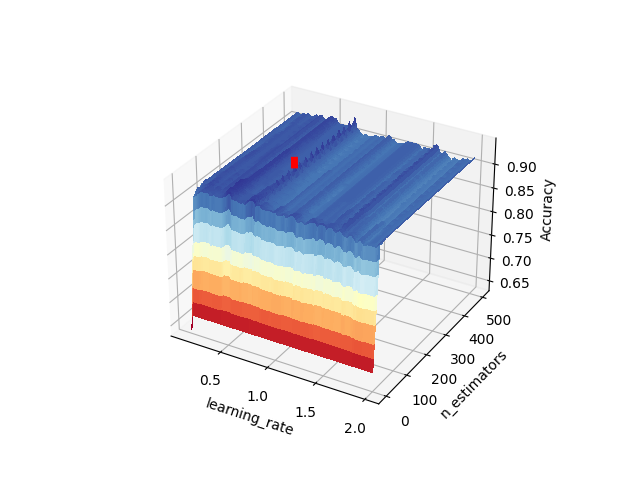

In [45]:

soybean_comb1 = np.load(".\\np_arrays\\soybean_xgb_comb1_error.npy")
soybean_comb1_zoom1 = np.load(".\\np_arrays_50\\soybean_xgb_comb1_zoom1_error_50.npy")

soybean_comb1_m1, soybean_comb1_m2 = comb_mesh(soybean_meshes, comb=1)

#soybean_learning_rate_comb1_zoom1_lin, soybean_n_estimators_comb1_zoom1_lin, soybean_learning_rate_comb1_zoom1_mesh, soybean_n_estimators_comb1_zoom1_mesh = 
#zoom(soybean_xgb_comb1_error, learning_rate, n_estimators, "float", "int")
soybean_comb1_zoom1_lin1, soybean_comb1_zoom1_lin2, soybean_comb1_zoom1_m1, soybean_comb1_zoom1_m2 = zoom(soybean_comb1,
                                                                                                         soybean_learning_rate,
                                                                                                         soybean_n_estimators,
                                                                                                         "float",
                                                                                                         "int")


learning_rate_temp = np.linspace(0.1, 2.0, 150)
n_estimators_temp = np.linspace(1, 500, 150, dtype=int)

input_arrays = np.array([soybean_comb1, soybean_comb1_zoom1])
input_meshes = np.array([(soybean_comb1_m1, soybean_comb1_m2),
                        (soybean_comb1_zoom1_m1, soybean_comb1_zoom1_m2)])

soybean_comb1_interp, soybean_comb1_interp_m1, soybean_comb1_interp_m2 = interpolate_lin(learning_rate_temp, 
                                                                                         n_estimators_temp,
                                                                                        input_arrays,
                                                                                        input_meshes)

surface = 1 - soybean_comb1_interp

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("learning_rate")
ax.set_ylabel("n_estimators")
ax.set_zlabel("Accuracy")
surf = ax.plot_surface(soybean_comb1_interp_m1, soybean_comb1_interp_m2,
                       surface, 
                       cmap=cm.RdYlBu, linewidth=0, antialiased=False, rstride=1, cstride=1)

x_axis, y_axis = np.where(surface == np.max(surface))

plot = ax.plot([soybean_comb1_interp_m1[x_axis[0], y_axis[0]],soybean_comb1_interp_m1[x_axis[0], y_axis[0]]],
       [soybean_comb1_interp_m2[x_axis[0], y_axis[0]], soybean_comb1_interp_m2[x_axis[0], y_axis[0]]],
       [np.max(surface), np.max(surface + (np.max(surface)/100))], c="red", zorder=3.5, linewidth=5)
plot

In [21]:
ax.savefig("images/new/test.png")

AttributeError: 'Axes3DSubplot' object has no attribute 'savefig'

## Soybean Comb 2

In [11]:
soybean_xgb_comb2_error = np.load(".\\np_arrays\\soybean_xgb_comb2_error.npy")
soybean_xgb_comb2_error.shape

(20, 20)

In [12]:
soybean_xgb_comb2_zoom1_error = np.load(".\\np_arrays_50\\soybean_xgb_comb2_zoom1_error_50.npy")
soybean_xgb_comb2_zoom1_error.shape

(50, 50)

In [13]:
soybean_learning_rate_comb2_zoom1_lin, soybean_max_depth_comb2_zoom1_lin, soybean_learning_rate_comb2_zoom1_mesh, soybean_max_depth_comb2_zoom1_mesh = zoom(soybean_xgb_comb2_error, learning_rate, max_depth, "float", "int")

(soybean_learning_rate_comb2_zoom1_lin, soybean_max_depth_comb2_zoom1_lin)

(array([0.10526316, 0.14393126, 0.18259936, 0.22126745, 0.25993555,
        0.29860365, 0.33727175, 0.37593985, 0.41460795, 0.45327605,
        0.49194415, 0.53061224, 0.56928034, 0.60794844, 0.64661654,
        0.68528464, 0.72395274, 0.76262084, 0.80128894, 0.83995704,
        0.87862513, 0.91729323, 0.95596133, 0.99462943, 1.03329753,
        1.07196563, 1.11063373, 1.14930183, 1.18796992, 1.22663802,
        1.26530612, 1.30397422, 1.34264232, 1.38131042, 1.41997852,
        1.45864662, 1.49731472, 1.53598281, 1.57465091, 1.61331901,
        1.65198711, 1.69065521, 1.72932331, 1.76799141, 1.80665951,
        1.8453276 , 1.8839957 , 1.9226638 , 1.9613319 , 2.        ]),
 array([ 1,  1,  2,  3,  3,  4,  5,  5,  6,  7,  7,  8,  9, 10, 10, 11, 12,
        12, 13, 14, 14, 15, 16, 16, 17, 18, 19, 19, 20, 21, 21, 22, 23, 23,
        24, 25, 25, 26, 27, 28, 28, 29, 30, 30, 31, 32, 32, 33, 34, 35]))

<IPython.core.display.Javascript object>


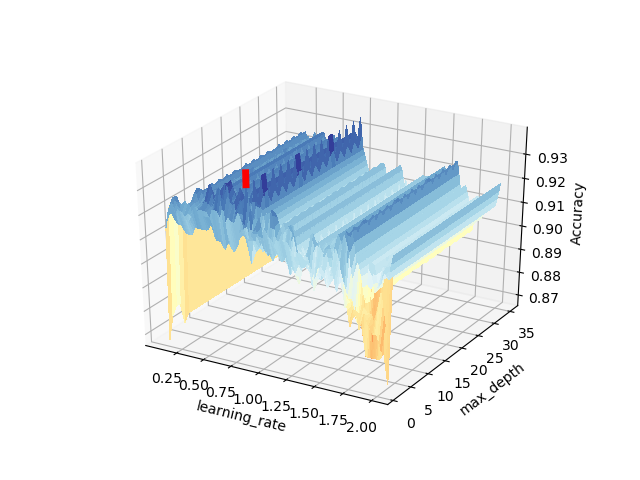

In [34]:
learning_rate_temp = np.linspace(0.1,2.0,150)
max_depth_temp = np.linspace(1,35,150, dtype=int)

input_arrays = np.array([soybean_xgb_comb2_error, soybean_xgb_comb2_zoom1_error])
input_meshes = np.array([(learning_rate_comb2, max_depth_comb2),
                         (soybean_learning_rate_comb2_zoom1_mesh, soybean_max_depth_comb2_zoom1_mesh)])


soybean_comb2_interp, soybean_comb2_interp_m1, soybean_comb2_interp_m2 = interpolate_lin(learning_rate_temp, max_depth_temp,
                                                                                    input_arrays, input_meshes)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("learning_rate")
ax.set_ylabel("max_depth")
ax.set_zlabel("Accuracy")

surface = soybean_comb2_interp
surface = 1 - surface

ax.plot_surface(soybean_comb2_interp_m1, soybean_comb2_interp_m2,
                       surface, 
                       cmap=cm.RdYlBu, linewidth=0, antialiased=False, rstride=1, cstride=1)

x_axis, y_axis = np.where(surface == np.max(surface))
'''
ax.scatter(soybean_comb2_interp_m1[x_axis[0], y_axis[0]], 
           soybean_comb2_interp_m2[x_axis[0], y_axis[0]],
          np.log(soybean_comb2_interp[x_axis[0], y_axis[0]]), c="red")
'''

ax.plot([soybean_comb2_interp_m1[x_axis[0], y_axis[0]],soybean_comb2_interp_m1[x_axis[0], y_axis[0]]],
       [soybean_comb2_interp_m2[x_axis[0], y_axis[0]], soybean_comb2_interp_m2[x_axis[0], y_axis[0]]],
       [np.max(surface), np.max(surface + (np.max(surface)/200))], c="red", linewidth=5, zorder=3.5)

<IPython.core.display.Javascript object>


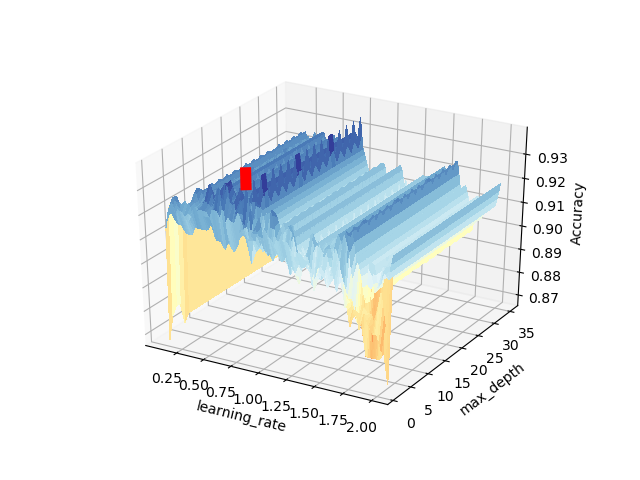

In [54]:

soybean_comb2 = np.load("./np_arrays/soybean_xgb_comb2_error.npy")
soybean_comb2_zoom1 = np.load("./np_arrays_50/soybean_xgb_comb2_zoom1_error_50.npy")

soybean_comb2_m1, soybean_comb2_m2 = comb_mesh(soybean_meshes, comb=2)

#soybean_learning_rate_comb2_zoom1_lin, soybean_max_depth_comb2_zoom1_lin, soybean_learning_rate_comb2_zoom1_mesh, soybean_max_depth_comb2_zoom1_mesh = zoom(soybean_xgb_comb2_error, learning_rate, max_depth, "float", "int")
soybean_comb2_zoom1_lin1, soybean_comb2_zoom1_lin2, soybean_comb2_zoom1_m1, soybean_comb2_zoom1_m2 = zoom(soybean_comb2,
                                                                                                         soybean_learning_rate,
                                                                                                         soybean_max_depth,
                                                                                                         "float",
                                                                                                         "int")
#zoom_2(surface, mesh_1, mesh_2, percentage=0.5, resolution=50, htype1="float", htype2="float", sort_dir="asc")
#soybean_comb2_zoom1_lin1, soybean_comb2_zoom1_lin2, soybean_comb2_zoom1_m1, soybean_comb2_zoom1_m2 = zoom_2(soybean_comb2,
#                                                                                                           soybean_comb2_m1, 
#                                                                                                            soybean_comb2_m2,
#                                                                                                           percentage=0.5,
#                                                                                                           resolution=50,
#                                                                                                           htype1="float",
#                                                                                                           htype2="int")

'''
soybean_comb2_m1 = soybean_comb2_m1[:].astype(float)
soybean_comb2_m2 = soybean_comb2_m2[:].astype(float)
soybean_comb2_zoom1_m1 = soybean_comb2_zoom1_m1[:].astype(float)
soybean_comb2_zoom1_m2 = soybean_comb2_zoom1_m2[:].astype(float)
'''

#soybean_comb2_m2 = soybean_comb2_m2[::].astype(np.float)
#soybean_comb2_zoom1_m2 = soybean_comb2_zoom1_m2[::].astype(np.float)

learning_rate_temp = np.linspace(0.1, 2.0, 150)
max_depth_temp = np.linspace(1,35,150,dtype=int)

input_arrays = np.array([soybean_comb2, soybean_comb2_zoom1])
input_meshes = np.array([(soybean_comb2_m1, soybean_comb2_m2),
                        (soybean_comb2_zoom1_m1, soybean_comb2_zoom1_m2)])

soybean_comb2_interp, soybean_comb2_interp_m1, soybean_comb2_interp_m2 = interpolate_lin(learning_rate_temp, 
                                                                                        max_depth_temp,
                                                                                        input_arrays,
                                                                                        input_meshes)

surface = 1 - soybean_comb2_interp

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("learning_rate")
ax.set_ylabel("max_depth")
ax.set_zlabel("Accuracy")
surf = ax.plot_surface(soybean_comb2_interp_m1, soybean_comb2_interp_m2,
                       surface, 
                       cmap=cm.RdYlBu, antialiased=False, rstride=1, cstride=1)

x_axis, y_axis = np.where(surface == np.max(surface))

ax.plot([soybean_comb2_interp_m1[x_axis[0], y_axis[0]],soybean_comb2_interp_m1[x_axis[0], y_axis[0]]],
       [soybean_comb2_interp_m2[x_axis[0], y_axis[0]], soybean_comb2_interp_m2[x_axis[0], y_axis[0]]],
       [np.max(surface), np.max(surface + (np.max(surface)/200))], c="red", linewidth=8, zorder=3.5)

In [53]:
soybean_comb2_zoom1_m2

array([[ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 2,  2,  2, ...,  2,  2,  2],
       ...,
       [33, 33, 33, ..., 33, 33, 33],
       [34, 34, 34, ..., 34, 34, 34],
       [35, 35, 35, ..., 35, 35, 35]])

In [16]:
import sys
output = np.empty((0,3), float)

for x in range(soybean_comb2_interp.shape[0]):
    for y in range(soybean_comb2_interp.shape[1]):
        output = np.vstack((output, np.array([soybean_comb2_interp_m1[y,x], soybean_comb2_interp_m2[y,x],soybean_comb2_interp[y,x]])))
np.set_printoptions(threshold=sys.maxsize)
output

array([[ 0.1       ,  1.        ,  0.13321662],
       [ 0.1       ,  1.        ,  0.13321662],
       [ 0.1       ,  1.        ,  0.13321662],
       [ 0.1       ,  2.        ,  0.12386258],
       [ 0.1       ,  2.        ,  0.12386258],
       [ 0.1       ,  2.        ,  0.12386258],
       [ 0.1       ,  3.        ,  0.12077816],
       [ 0.1       ,  3.        ,  0.12077816],
       [ 0.1       ,  3.        ,  0.12077816],
       [ 0.1       ,  4.        ,  0.12077816],
       [ 0.1       ,  4.        ,  0.12077816],
       [ 0.1       ,  4.        ,  0.12077816],
       [ 0.1       ,  5.        ,  0.13003141],
       [ 0.1       ,  5.        ,  0.13003141],
       [ 0.1       ,  5.        ,  0.13003141],
       [ 0.1       ,  6.        ,  0.12694699],
       [ 0.1       ,  6.        ,  0.12694699],
       [ 0.1       ,  6.        ,  0.12694699],
       [ 0.1       ,  7.        ,  0.12694699],
       [ 0.1       ,  7.        ,  0.12694699],
       [ 0.1       ,  7.        ,  0.126

## Soybean Comb 4

<ipython-input-37-bfa4e6108aea>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_arrays = np.array([soybean_xgb_comb4_error, soybean_xgb_comb4_zoom1_error, soybean_xgb_comb4_zoom2_error])
<ipython-input-37-bfa4e6108aea>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_meshes = np.array([(n_estimators_comb4, max_depth_comb4),


<IPython.core.display.Javascript object>


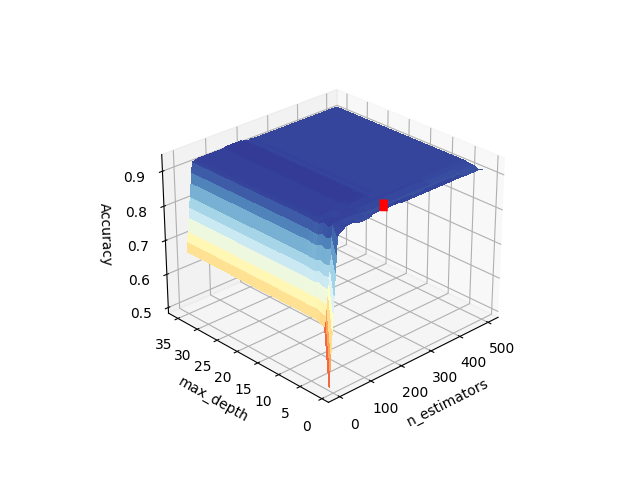

In [37]:
soybean_xgb_comb4_error = np.load(".\\np_arrays\\soybean_xgb_comb4_error.npy")
soybean_xgb_comb4_zoom1_error = np.load(".\\np_arrays_50\\soybean_xgb_comb4_zoom1_error_50.npy")
soybean_xgb_comb4_zoom2_error = np.load(".\\np_arrays_50\\soybean_xgb_comb4_zoom2_error_50.npy")

soybean_n_estimators_comb4_zoom1_lin, soybean_max_depth_comb4_zoom1_lin, soybean_n_estimators_comb4_zoom1_mesh, soybean_max_depth_comb4_zoom1_mesh = zoom(soybean_xgb_comb4_error, n_estimators, max_depth, "int", "int")
soybean_n_estimators_comb4_zoom2_lin, soybean_max_depth_comb4_zoom2_lin, soybean_n_estimators_comb4_zoom2_mesh, soybean_max_depth_comb4_zoom2_mesh = zoom(soybean_xgb_comb4_zoom1_error, soybean_n_estimators_comb4_zoom1_lin, soybean_max_depth_comb4_zoom1_lin, "int", "int")

n_estimators_temp = np.linspace(1,500,150, dtype=int)
max_depth_temp = np.linspace(1,35,150, dtype=int)

input_arrays = np.array([soybean_xgb_comb4_error, soybean_xgb_comb4_zoom1_error, soybean_xgb_comb4_zoom2_error])
input_meshes = np.array([(n_estimators_comb4, max_depth_comb4),
                        (soybean_n_estimators_comb4_zoom1_mesh, soybean_max_depth_comb4_zoom1_mesh),
                        (soybean_n_estimators_comb4_zoom2_mesh, soybean_max_depth_comb4_zoom2_mesh)])

soybean_comb4_interp, soybean_comb4_interp_m1, soybean_comb4_interp_m2 = interpolate_lin(n_estimators_temp, max_depth_temp,
                                                                                    input_arrays, input_meshes)
#soybean_comb4_interp = np.nan_to_num(soybean_comb1_interp, nan=np.average(soybean_comb1_interp))

surface = soybean_comb4_interp
surface = 1 - surface

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("n_estimators")
ax.set_ylabel("max_depth")
ax.set_zlabel("Accuracy")
ax.plot_surface(soybean_comb4_interp_m1, soybean_comb4_interp_m2,
                       surface, 
                       cmap=cm.RdYlBu, linewidth=0, antialiased=False, rstride=1, cstride=1, alpha=1)

x_axis, y_axis = np.where(surface == np.max(surface))
'''
ax.scatter(soybean_comb4_interp_m1[x_axis[0], y_axis[0]], 
           soybean_comb4_interp_m2[x_axis[0], y_axis[0]],
          np.log(soybean_comb4_interp[x_axis[0], y_axis[0]]), c="red")
'''

ax.plot([soybean_comb4_interp_m1[x_axis[0], y_axis[0]],soybean_comb4_interp_m1[x_axis[0], y_axis[0]]],
       [soybean_comb4_interp_m2[x_axis[0], y_axis[0]], soybean_comb4_interp_m2[x_axis[0], y_axis[0]]],
       [np.max(surface), np.max(surface + (np.max(surface)/100))], c="red", linewidth=6, zorder=3.5)

# Vehicle

In [36]:
#Change to 50 instances later

vehicle_learning_rate = np.linspace(0.0,2.0,20)
vehicle_n_estimators = np.linspace(1,500,20, dtype=int)
vehicle_max_depth = np.linspace(1,18,20, dtype=int)
vehicle_reg_lamda = np.linspace(0.0, 2.0, 20)

vehicle_learning_rate_comb1, vehicle_n_estimators_comb1 = np.meshgrid(vehicle_learning_rate, vehicle_n_estimators)
vehicle_learning_rate_comb2, vehicle_max_depth_comb2 = np.meshgrid(vehicle_learning_rate, vehicle_max_depth)
vehicle_learning_rate_comb3, vehicle_reg_lamda_comb3 = np.meshgrid(vehicle_learning_rate, vehicle_reg_lamda)

vehicle_n_estimators_comb4, vehicle_max_depth_comb4 = np.meshgrid(vehicle_n_estimators, vehicle_max_depth)
vehicle_n_estimators_comb5, vehicle_reg_lamda_comb5 = np.meshgrid(vehicle_n_estimators, vehicle_reg_lamda)

vehicle_max_depth_comb6, vehicle_reg_lamda_comb6 = np.meshgrid(vehicle_max_depth, vehicle_reg_lamda)

## Vehicle Comb 1

<IPython.core.display.Javascript object>


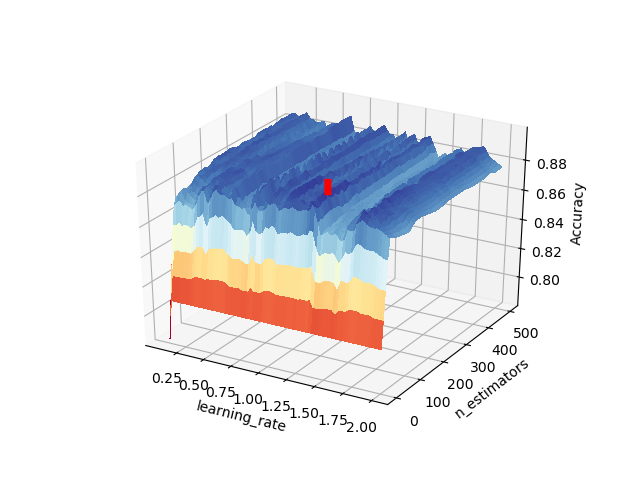

In [39]:
vehicle_xgb_comb1_error = np.load(".\\np_arrays\\vehicle_xgb_comb1_error.npy")
vehicle_xgb_comb1_zoom1_error = np.load(".\\np_arrays_50\\vehicle_xgb_comb1_zoom1_error_50.npy")

vehicle_learning_rate_comb1_zoom1_lin, vehicle_n_estimators_comb1_zoom1_lin, vehicle_learning_rate_comb1_zoom1_mesh, vehicle_max_depth_comb1_zoom1_mesh = zoom(vehicle_xgb_comb1_error, vehicle_learning_rate, vehicle_n_estimators, "float", "int")

learning_rate_temp = np.linspace(0.1,2.0,70)
n_estimators_temp = np.linspace(1,500,70, dtype=int)

input_arrays = np.array([vehicle_xgb_comb1_error, vehicle_xgb_comb1_zoom1_error])
input_meshes = np.array([(vehicle_learning_rate_comb1, vehicle_n_estimators_comb1),
                        (vehicle_learning_rate_comb1_zoom1_mesh, vehicle_max_depth_comb1_zoom1_mesh)])

vehicle_comb1_interp, vehicle_comb1_interp_m1, vehicle_comb1_interp_m2 = interpolate_lin(learning_rate_temp, n_estimators_temp,
                                                                                    input_arrays, input_meshes)

surface = 1 - vehicle_comb1_interp

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("learning_rate")
ax.set_ylabel("n_estimators")
ax.set_zlabel("Accuracy")
surf = ax.plot_surface(vehicle_comb1_interp_m1, vehicle_comb1_interp_m2,
                       surface, 
                       cmap=cm.RdYlBu, antialiased=False, rstride=1, cstride=1, alpha=1)

x_axis, y_axis = np.where(surface == np.max(surface))
'''
ax.scatter(vehicle_comb1_interp_m1[x_axis[0], y_axis[0]], 
           vehicle_comb1_interp_m2[x_axis[0], y_axis[0]],
          vehicle_comb1_interp[x_axis[0], y_axis[0]], c="red")
'''

ax.plot([vehicle_comb1_interp_m1[x_axis[0], y_axis[0]],vehicle_comb1_interp_m1[x_axis[0], y_axis[0]]],
       [vehicle_comb1_interp_m2[x_axis[0], y_axis[0]], vehicle_comb1_interp_m2[x_axis[0], y_axis[0]]],
       [np.max(surface), np.max(surface + (np.max(surface)/150))], c="red", linewidth=5, zorder=3.5)

## Vehicle Comb 2

<IPython.core.display.Javascript object>


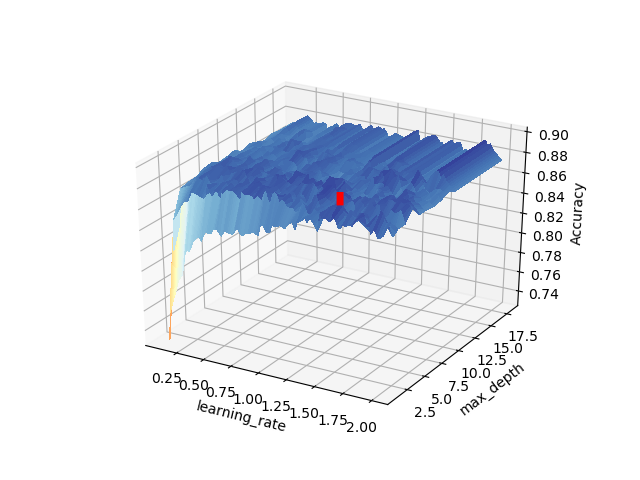

In [49]:
vehicle_xgb_comb2_error = np.load(".\\np_arrays\\vehicle_xgb_comb2_error.npy")
vehicle_xgb_comb2_zoom1_error = np.load(".\\np_arrays_50\\vehicle_xgb_comb2_zoom1_error_50.npy")

vehicle_learning_rate_zoom1, vehicle_max_depth_zoom1, vehicle_learning_rate_comb2_zoom1, vehicle_max_depth_comb2_zoom1 = zoom(vehicle_xgb_comb2_error, vehicle_learning_rate, vehicle_max_depth, "float", "int")

learning_rate_temp = np.linspace(0.1,2.0,150)
max_depth_temp = np.linspace(1,18,150, dtype=int)

input_arrays = np.array([vehicle_xgb_comb2_error, vehicle_xgb_comb2_zoom1_error])
input_meshes = np.array([(vehicle_learning_rate_comb2, vehicle_max_depth_comb2),
                        (vehicle_learning_rate_comb2_zoom1, vehicle_max_depth_comb2_zoom1)])

vehicle_comb2_interp, vehicle_comb2_interp_m1, vehicle_comb2_interp_m2 = interpolate_lin(learning_rate_temp, max_depth_temp,
                                                                                    input_arrays, input_meshes)

surface = 1 - vehicle_comb2_interp

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("learning_rate")
ax.set_ylabel("max_depth")
ax.set_zlabel("Accuracy")
surf = ax.plot_surface(vehicle_comb2_interp_m1, vehicle_comb2_interp_m2,
                       surface, 
                       cmap=cm.RdYlBu, linewidth=0, antialiased=False, rstride=1, cstride=1, alpha=1)

x_axis, y_axis = np.where(surface == np.max(surface))
'''
ax.scatter(vehicle_comb2_interp_m1[x_axis[0], y_axis[0]], 
           vehicle_comb2_interp_m2[x_axis[0], y_axis[0]],
          np.log(vehicle_comb2_interp[x_axis[0], y_axis[0]]), c="red")
'''

ax.plot([vehicle_comb2_interp_m1[x_axis[0], y_axis[0]],vehicle_comb2_interp_m1[x_axis[0], y_axis[0]]],
       [vehicle_comb2_interp_m2[x_axis[0], y_axis[0]], vehicle_comb2_interp_m2[x_axis[0], y_axis[0]]],
       [np.max(surface), np.max(surface + (np.max(surface)/150))], c="red", linewidth=5, zorder=3.5)

## Vehicle Comb 4

<ipython-input-51-8012a9334c9c>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_arrays = np.array([vehicle_xgb_comb4_error, vehicle_xgb_comb4_zoom1_error])
<ipython-input-51-8012a9334c9c>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_meshes = np.array([(vehicle_n_estimators_comb4, vehicle_max_depth_comb4),


<IPython.core.display.Javascript object>


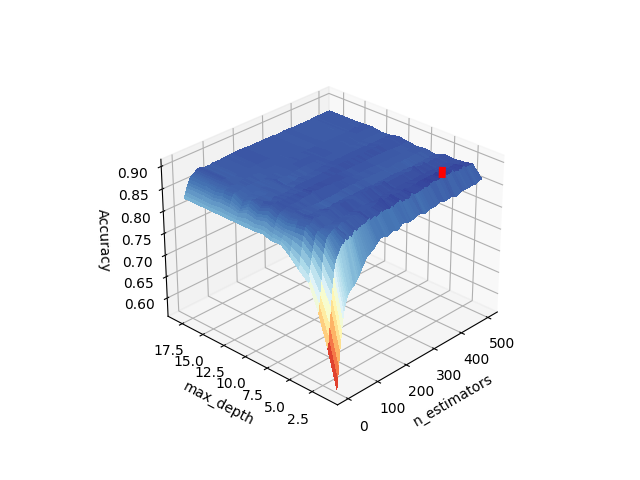

In [51]:
vehicle_xgb_comb4_error = np.load(".\\np_arrays\\vehicle_xgb_comb4_error.npy")
vehicle_xgb_comb4_zoom1_error = np.load(".\\np_arrays_50\\vehicle_xgb_comb4_zoom1_error_50.npy")

vehicle_n_estimators_zoom1, vehicle_max_depth_zoom1, vehicle_n_estimators_comb4_zoom1, vehicle_max_depth_comb4_zoom1 = zoom(vehicle_xgb_comb4_error, vehicle_n_estimators, vehicle_max_depth, "int", "int")

n_estimators_temp = np.linspace(1, 500, 150, dtype=int)
max_depth_temp = np.linspace(1,18,150, dtype=int)

input_arrays = np.array([vehicle_xgb_comb4_error, vehicle_xgb_comb4_zoom1_error])
input_meshes = np.array([(vehicle_n_estimators_comb4, vehicle_max_depth_comb4),
                        (vehicle_n_estimators_comb4_zoom1, vehicle_max_depth_comb4_zoom1)])

vehicle_comb4_interp, vehicle_comb4_interp_m1, vehicle_comb4_interp_m2 = interpolate(n_estimators_temp, max_depth_temp,
                                                                                    input_arrays, input_meshes)

surface = 1 - vehicle_comb4_interp

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("n_estimators")
ax.set_ylabel("max_depth")
ax.set_zlabel("Accuracy")
surf = ax.plot_surface(vehicle_comb4_interp_m1, vehicle_comb4_interp_m2,
                       surface, 
                       cmap=cm.RdYlBu, linewidth=0, antialiased=False, rstride=1, cstride=1, alpha=1)

x_axis, y_axis = np.where(vehicle_comb4_interp == np.min(vehicle_comb4_interp))
'''
ax.scatter(vehicle_comb4_interp_m1[x_axis[0], y_axis[0]], 
           vehicle_comb4_interp_m2[x_axis[0], y_axis[0]],
          np.log(vehicle_comb4_interp[x_axis[0], y_axis[0]]), c="red")
'''

ax.plot([vehicle_comb4_interp_m1[x_axis[0], y_axis[0]],vehicle_comb4_interp_m1[x_axis[0], y_axis[0]]],
       [vehicle_comb4_interp_m2[x_axis[0], y_axis[0]], vehicle_comb4_interp_m2[x_axis[0], y_axis[0]]],
       [np.max(surface), np.max(surface + (np.max(surface)/100))], c="red", linewidth=5, zorder=3.5)

# Housing 

In [52]:
housing_learning_rate = np.linspace(0.0,2.0,20)
housing_n_estimators = np.linspace(1,500,20, dtype=int)
housing_max_depth = np.linspace(1,13,20, dtype=int)
housing_reg_lamda = np.linspace(0.0, 2.0, 20)

housing_learning_rate_comb1, housing_n_estimators_comb1 = np.meshgrid(housing_learning_rate, housing_n_estimators)
housing_learning_rate_comb2, housing_max_depth_comb2 = np.meshgrid(housing_learning_rate, housing_max_depth)
housing_learning_rate_comb3, housing_reg_lamda_comb3 = np.meshgrid(housing_learning_rate, housing_reg_lamda)

housing_n_estimators_comb4, housing_max_depth_comb4 = np.meshgrid(housing_n_estimators, housing_max_depth)
housing_n_estimators_comb5, housing_reg_lamda_comb5 = np.meshgrid(housing_n_estimators, housing_reg_lamda)

housing_max_depth_comb6, housing_reg_lamda_comb6 = np.meshgrid(housing_max_depth, housing_reg_lamda)

## Housing Comb 1

<ipython-input-54-1730a0e335d4>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_arrays = np.array([housing_xgb_comb1_error, housing_xgb_comb1_zoom1_error, housing_xgb_comb1_zoom2_error,
<ipython-input-54-1730a0e335d4>:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_meshes = np.array([(housing_learning_rate_comb1, housing_n_estimators_comb1),


<IPython.core.display.Javascript object>


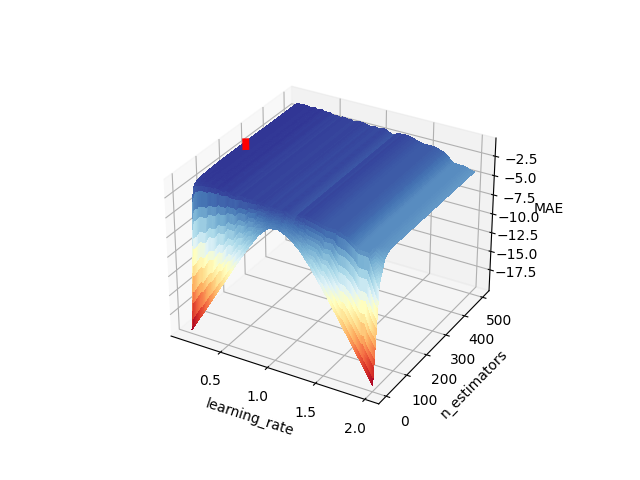

In [54]:
housing_xgb_comb1_error = np.load(".\\np_arrays\\housing_xgb_comb1_error.npy")
housing_xgb_comb1_zoom1_error = np.load(".\\np_arrays_50\\housing_xgb_comb1_zoom1_error_50.npy")
housing_xgb_comb1_zoom2_error = np.load(".\\np_arrays_50\\housing_xgb_comb1_zoom2_error_50.npy")
housing_xgb_comb1_zoom3_error = np.load(".\\np_arrays_50\\housing_xgb_comb1_zoom3_error_50.npy")
housing_xgb_comb1_zoom4_error = np.load(".\\np_arrays_50\\housing_xgb_comb1_zoom4_error_50.npy")

housing_learning_rate_comb1_zoom1_lin, housing_n_estimators_comb1_zoom1_lin, housing_learning_rate_comb1_zoom1_mesh, housing_max_depth_comb1_zoom1_mesh = zoom(housing_xgb_comb1_error, housing_learning_rate, housing_n_estimators, "flaot", "int")
housing_learning_rate_comb1_zoom2_lin, housing_n_estimators_comb1_zoom2_lin, housing_learning_rate_comb1_zoom2_mesh, housing_max_depth_comb1_zoom2_mesh = zoom(housing_xgb_comb1_zoom1_error, housing_learning_rate_comb1_zoom1_lin, housing_n_estimators_comb1_zoom1_lin, "flaot", "int")
housing_learning_rate_comb1_zoom3_lin, housing_n_estimators_comb1_zoom3_lin, housing_learning_rate_comb1_zoom3_mesh, housing_max_depth_comb1_zoom3_mesh = zoom(housing_xgb_comb1_zoom2_error, housing_learning_rate_comb1_zoom2_lin, housing_n_estimators_comb1_zoom2_lin, "flaot", "int")
housing_learning_rate_comb1_zoom4_lin, housing_n_estimators_comb1_zoom4_lin, housing_learning_rate_comb1_zoom4_mesh, housing_max_depth_comb1_zoom4_mesh = zoom(housing_xgb_comb1_zoom3_error, housing_learning_rate_comb1_zoom3_lin, housing_n_estimators_comb1_zoom3_lin, "flaot", "int")

learning_rate_temp = np.linspace(0.1,2.0,200)
n_estimators_temp = np.linspace(1,500,200, dtype=int)

input_arrays = np.array([housing_xgb_comb1_error, housing_xgb_comb1_zoom1_error, housing_xgb_comb1_zoom2_error, 
                        housing_xgb_comb1_zoom3_error, housing_xgb_comb1_zoom4_error])
input_meshes = np.array([(housing_learning_rate_comb1, housing_n_estimators_comb1),
                        (housing_learning_rate_comb1_zoom1_mesh, housing_max_depth_comb1_zoom1_mesh),
                        (housing_learning_rate_comb1_zoom2_mesh, housing_max_depth_comb1_zoom2_mesh),
                        (housing_learning_rate_comb1_zoom3_mesh, housing_max_depth_comb1_zoom3_mesh),
                        (housing_learning_rate_comb1_zoom4_mesh, housing_max_depth_comb1_zoom4_mesh)])

housing_comb1_interp, housing_comb1_interp_m1, housing_comb1_interp_m2 = interpolate_lin(learning_rate_temp, n_estimators_temp,
                                                                                    input_arrays, input_meshes)

surface = 0 - housing_comb1_interp

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("learning_rate")
ax.set_ylabel("n_estimators")
ax.set_zlabel("MAE")
surf = ax.plot_surface(housing_comb1_interp_m1, housing_comb1_interp_m2,
                       surface, 
                       cmap=cm.RdYlBu, linewidth=0, antialiased=False, rstride=1, cstride=1, alpha=1)

x_axis, y_axis = np.where(surface == np.max(surface))

'''
ax.scatter(housing_comb1_interp_m1[x_axis[0], y_axis[0]], 
           housing_comb1_interp_m2[x_axis[0], y_axis[0]],
          np.log(housing_comb1_interp[x_axis[0], y_axis[0]]), c="red")
'''

ax.plot([housing_comb1_interp_m1[x_axis[0], y_axis[0]],housing_comb1_interp_m1[x_axis[0], y_axis[0]]],
       [housing_comb1_interp_m2[x_axis[0], y_axis[0]], housing_comb1_interp_m2[x_axis[0], y_axis[0]]],
       [np.max(surface), np.max(surface - (np.max(surface)/2))], c="red", zorder=3.5, linewidth=5)

## Housing Comb 2

<ipython-input-55-96081453f3ad>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_arrays = np.array([housing_xgb_comb2_error, housing_xgb_comb2_zoom1_error, housing_xgb_comb2_zoom2_error,
<ipython-input-55-96081453f3ad>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_meshes = np.array([(housing_learning_rate_comb2, housing_max_depth_comb2),


<IPython.core.display.Javascript object>


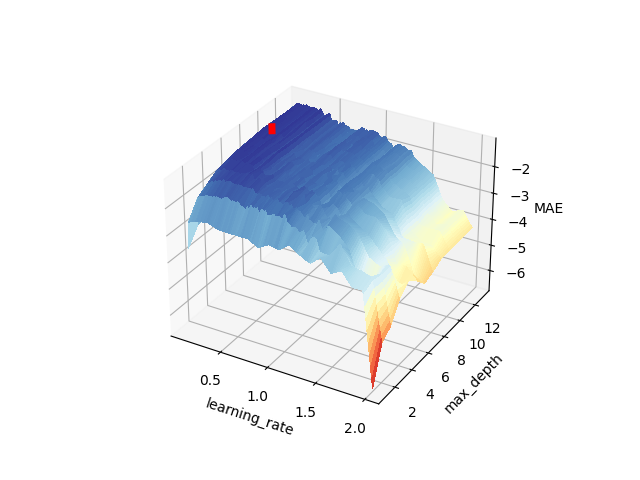

In [55]:
housing_xgb_comb2_error = np.load(".\\np_arrays\\housing_xgb_comb2_error.npy")
housing_xgb_comb2_zoom1_error = np.load(".\\np_arrays_50\\housing_xgb_comb2_zoom1_error_50.npy")
housing_xgb_comb2_zoom2_error = np.load(".\\np_arrays_50\\housing_xgb_comb2_zoom2_error_50.npy")
housing_xgb_comb2_zoom3_error = np.load(".\\np_arrays_50\\housing_xgb_comb2_zoom3_error_50.npy")

housing_learning_rate_comb2_zoom1_lin, housing_max_depth_comb2_zoom1_lin, housing_learning_rate_comb2_zoom1_mesh, housing_max_depth_comb2_zoom1_mesh = zoom(housing_xgb_comb2_error, housing_learning_rate, housing_max_depth, "float", "int")
housing_learning_rate_comb2_zoom2_lin, housing_max_depth_comb2_zoom2_lin, housing_learning_rate_comb2_zoom2_mesh, housing_max_depth_comb2_zoom2_mesh = zoom(housing_xgb_comb2_zoom1_error, housing_learning_rate_comb2_zoom1_lin, housing_max_depth_comb2_zoom1_lin, "float", "int")
housing_learning_rate_comb2_zoom3_lin, housing_max_depth_comb2_zoom3_lin, housing_learning_rate_comb2_zoom3_mesh, housing_max_depth_comb2_zoom3_mesh = zoom(housing_xgb_comb2_zoom2_error, housing_learning_rate_comb2_zoom2_lin, housing_max_depth_comb2_zoom2_lin, "float", "int")

learning_rate_temp = np.linspace(0.1,2.0,150)
max_depth_temp = np.linspace(1,13,150, dtype=int)

input_arrays = np.array([housing_xgb_comb2_error, housing_xgb_comb2_zoom1_error, housing_xgb_comb2_zoom2_error,
                        housing_xgb_comb2_zoom3_error])
input_meshes = np.array([(housing_learning_rate_comb2, housing_max_depth_comb2),
                        (housing_learning_rate_comb2_zoom1_mesh, housing_max_depth_comb2_zoom1_mesh),
                        (housing_learning_rate_comb2_zoom2_mesh, housing_max_depth_comb2_zoom2_mesh),
                        (housing_learning_rate_comb2_zoom3_mesh, housing_max_depth_comb2_zoom3_mesh)])

housing_comb2_interp, housing_comb2_interp_m1, housing_comb2_interp_m2 = interpolate_lin(learning_rate_temp, max_depth_temp,
                                                                                    input_arrays, input_meshes)

surface = 0 - housing_comb2_interp

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("learning_rate")
ax.set_ylabel("max_depth")
ax.set_zlabel("MAE")
surf = ax.plot_surface(housing_comb2_interp_m1, housing_comb2_interp_m2,
                       surface, 
                       cmap=cm.RdYlBu, linewidth=0, antialiased=False, rstride=1, cstride=1 )

x_axis, y_axis = np.where(surface == np.max(surface))

ax.plot([housing_comb2_interp_m1[x_axis[0], y_axis[0]],housing_comb2_interp_m1[x_axis[0], y_axis[0]]],
       [housing_comb2_interp_m2[x_axis[0], y_axis[0]], housing_comb2_interp_m2[x_axis[0], y_axis[0]]],
       [np.max(surface), np.max(surface - (np.max(surface)/8))], c="red", zorder=3.5, linewidth=5)

## Housing Comb 4

<ipython-input-56-58bb4697dfaf>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_arrays = np.array([housing_xgb_comb4_error, housing_xgb_comb4_zoom1_error, housing_xgb_comb4_zoom2_error])
<ipython-input-56-58bb4697dfaf>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_meshes = np.array([(housing_n_estimators_comb4, housing_max_depth_comb4),


<IPython.core.display.Javascript object>


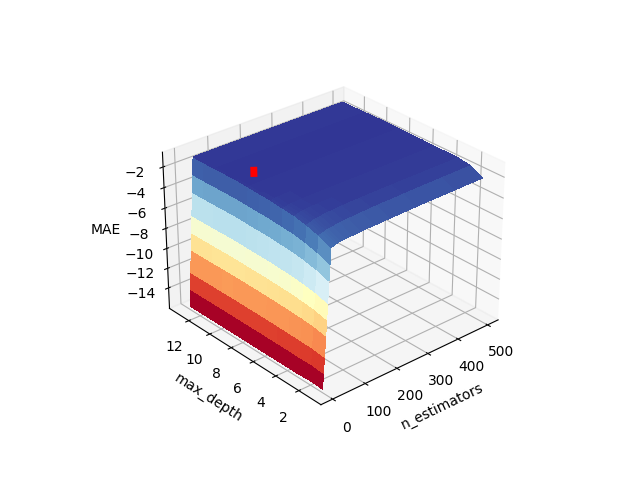

In [56]:
housing_xgb_comb4_error = np.load(".\\np_arrays\\housing_xgb_comb4_error.npy")
housing_xgb_comb4_zoom1_error = np.load(".\\np_arrays_50\\housing_xgb_comb4_zoom1_error_50.npy")
housing_xgb_comb4_zoom2_error = np.load(".\\np_arrays_50\\housing_xgb_comb4_zoom2_error_50.npy")

housing_n_estimators_comb4_zoom1_lin, housing_max_depth_comb4_zoom1_lin, housing_n_estimators_comb4_zoom1_mesh, housing_max_depth_comb4_zoom1_mesh = zoom(housing_xgb_comb4_error, housing_n_estimators, housing_max_depth, "int", "int")
housing_n_estimators_comb4_zoom2_lin, housing_max_depth_comb4_zoom2_lin, housing_n_estimators_comb4_zoom2_mesh, housing_max_depth_comb4_zoom2_mesh = zoom(housing_xgb_comb4_zoom1_error, housing_n_estimators_comb4_zoom1_lin, housing_max_depth_comb4_zoom1_lin, "int", "int")

n_estimators_temp = np.linspace(1,500,150, dtype=int)
max_depth_temp = np.linspace(1,13,150, dtype=int)

input_arrays = np.array([housing_xgb_comb4_error, housing_xgb_comb4_zoom1_error, housing_xgb_comb4_zoom2_error])
input_meshes = np.array([(housing_n_estimators_comb4, housing_max_depth_comb4),
                        (housing_n_estimators_comb4_zoom1_mesh, housing_max_depth_comb4_zoom1_mesh),
                        (housing_n_estimators_comb4_zoom2_mesh, housing_max_depth_comb4_zoom2_mesh)])

housing_comb4_interp, housing_comb4_interp_m1, housing_comb4_interp_m2 = interpolate_lin(n_estimators_temp, max_depth_temp,
                                                                                    input_arrays, input_meshes)

surface = 0 - housing_comb4_interp

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("n_estimators")
ax.set_ylabel("max_depth")
ax.set_zlabel("MAE")
surf = ax.plot_surface(housing_comb4_interp_m1, housing_comb4_interp_m2,
                       surface, 
                       cmap=cm.RdYlBu, linewidth=0, antialiased=False, rstride=1, cstride=1 )

x_axis, y_axis = np.where(surface == np.max(surface))

ax.plot([housing_comb4_interp_m1[x_axis[0], y_axis[0]],housing_comb4_interp_m1[x_axis[0], y_axis[0]]],
       [housing_comb4_interp_m2[x_axis[0], y_axis[0]], housing_comb4_interp_m2[x_axis[0], y_axis[0]]],
       [np.max(surface), np.max(surface - (np.max(surface)/4))], c="red", zorder=3.5, linewidth=5)

# Forestfires

In [57]:
forestfires = pd.read_csv("forestfires_pp.csv")
forestfires_X = forestfires.drop(["area"], axis=1)
forestfires_y = forestfires["area"]

In [58]:
forestfires_learning_rate = np.linspace(0.0,2.0,20)
forestfires_n_estimators = np.linspace(1,500,20, dtype=int)
forestfires_max_depth = np.linspace(1,29,20, dtype=int)
forestfires_reg_lamda = np.linspace(0.0, 2.0, 20)

forestfires_ranges = (forestfires_learning_rate, forestfires_n_estimators, forestfires_max_depth, forestfires_reg_lamda)

In [59]:
forestfires_meshes = generate_meshgrids(forestfires_ranges)

In [60]:
forestfires_comb1_m, forestfires_comb2_m, forestfires_comb3_m, forestfires_comb4_m, forestfires_comb5_m, forestfires_comb6_m = forestfires_meshes

forestfires_comb1_m1, forestfires_comb1_m2 = forestfires_comb1_m
forestfires_comb2_m1, forestfires_comb2_m2 = forestfires_comb2_m
forestfires_comb3_m1, forestfires_comb3_m2 = forestfires_comb3_m
forestfires_comb4_m1, forestfires_comb4_m2 = forestfires_comb4_m
forestfires_comb5_m1, forestfires_comb5_m2 = forestfires_comb5_m
forestfires_comb6_m1, forestfires_comb6_m2 = forestfires_comb6_m



## Forestfires Comb 1

<ipython-input-61-c98f05e602d5>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_arrays = np.array([forestfires_comb1, forestfires_comb1_zoom1, forestfires_comb1_zoom2])
<ipython-input-61-c98f05e602d5>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_meshes = np.array([(forestfires_comb1_m1, forestfires_comb1_m2),


<IPython.core.display.Javascript object>


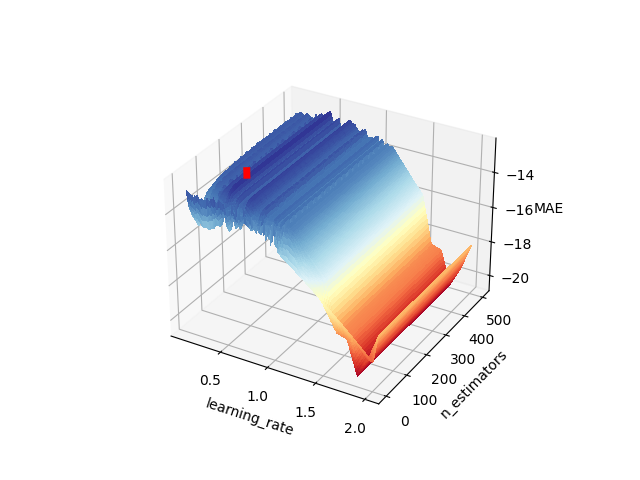

In [61]:
forestfires_comb1 = np.load("./np_arrays/forestfires_comb1.npy")
forestfires_comb1_zoom1 = np.load("./np_arrays_50/forestfires_comb1_zoom1.npy")
forestfires_comb1_zoom2 = np.load("./np_arrays_50/forestfires_comb1_zoom2.npy")

forestfires_comb1_zoom1_pack = zoom_2(forestfires_comb1, forestfires_comb1_m1, forestfires_comb1_m2,
                                     percentage=0.5, htype1="float", htype2="int", sort_dir="asc")
forestfires_comb1_zoom1_lin1, forestfires_comb1_zoom1_lin2, forestfires_comb1_zoom1_m1, forestfires_comb1_zoom1_m2 = forestfires_comb1_zoom1_pack
forestfires_comb1_zoom2_pack = zoom_2(forestfires_comb1_zoom1, forestfires_comb1_zoom1_m1, forestfires_comb1_zoom1_m1,
                                     percentage=0.5, htype1="float", htype2="int", sort_dir="asc")
forestfires_comb1_zoom2_lin1, forestfires_comb1_zoom2_lin2, forestfires_comb1_zoom2_m1, forestfires_comb1_zoom2_m2 = forestfires_comb1_zoom2_pack

learning_rate_temp = np.linspace(0.1, 2.0, 200)
n_estimators_temp = np.linspace(1, 500, 200, dtype=int)

input_arrays = np.array([forestfires_comb1, forestfires_comb1_zoom1, forestfires_comb1_zoom2])
input_meshes = np.array([(forestfires_comb1_m1, forestfires_comb1_m2),
                        (forestfires_comb1_zoom1_m1, forestfires_comb1_zoom1_m2),
                        (forestfires_comb1_zoom2_m1, forestfires_comb1_zoom2_m2)])

forestfires_comb1_interp, forestfires_comb1_interp_m1, forestfires_comb1_interp_m2 = interpolate_lin(learning_rate_temp,
                                                                                                    n_estimators_temp,
                                                                                                    input_arrays,
                                                                                                    input_meshes)

surface = 0 - forestfires_comb1_interp

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("learning_rate")
ax.set_ylabel("n_estimators")
ax.set_zlabel("MAE")
surf = ax.plot_surface(forestfires_comb1_interp_m1, forestfires_comb1_interp_m2,
                       surface, 
                       cmap=cm.RdYlBu, linewidth=0, antialiased=False, rstride=1, cstride=1)


x_axis, y_axis = np.where(surface == np.max(surface))

ax.plot([forestfires_comb1_interp_m1[x_axis[0], y_axis[0]],forestfires_comb1_interp_m1[x_axis[0], y_axis[0]]],
       [forestfires_comb1_interp_m2[x_axis[0], y_axis[0]], forestfires_comb1_interp_m2[x_axis[0], y_axis[0]]],
       [np.max(surface), np.max(surface - (np.max(surface)/50))], c="red", zorder=3.5, linewidth=5)

## Forestfires Comb 2

<ipython-input-62-9432556d04b1>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_arrays = np.array([forestfires_comb2, forestfires_comb2_zoom1])
<ipython-input-62-9432556d04b1>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_meshes = np.array([(forestfires_comb2_m1, forestfires_comb2_m2),


<IPython.core.display.Javascript object>


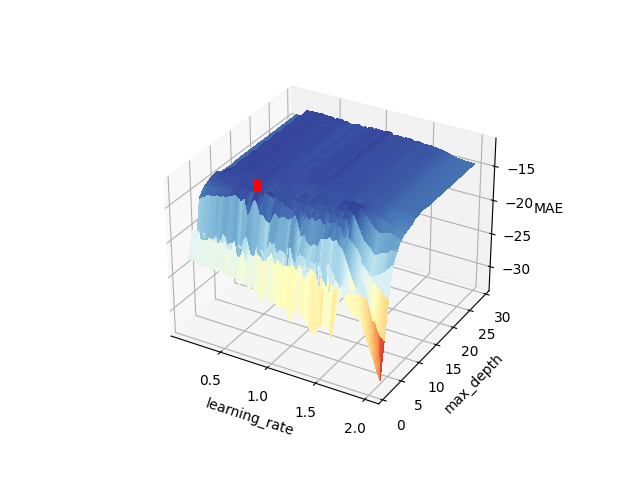

In [62]:

forestfires_comb2 = np.load("./np_arrays/forestfires_comb2.npy")
forestfires_comb2_zoom1 = np.load("./np_arrays_50/forestfires_comb2_zoom1.npy")

forestfires_comb2_zoom1_pack = zoom_2(forestfires_comb2, forestfires_comb2_m1, forestfires_comb2_m2,
                                   percentage=0.5, htype1="float", htype2="int", sort_dir="asc")
forestfires_comb2_zoom1_lin1, forestfires_comb2_zoom1_lin2, forestfires_comb2_zoom1_m1, forestfires_comb2_zoom1_m2 = forestfires_comb2_zoom1_pack
forestfires_comb2_zoom2_pack = zoom_2(forestfires_comb2_zoom1, forestfires_comb2_zoom1_m1, forestfires_comb2_zoom1_m2,
                                     percentage=0.5, htype1="float", htype2="int", sort_dir="asc")
forestfires_comb2_zoom2_lin1, forestfires_comb2_zoom2_lin2, forestfires_comb2_zoom2_m1, forestfires_comb2_zoom2_m2 = forestfires_comb2_zoom2_pack

learning_rate_temp= np.linspace(0.1, 2.0, 150)
max_depth_temp = np.linspace(1, 29, 150, dtype=int)

input_arrays = np.array([forestfires_comb2, forestfires_comb2_zoom1])
input_meshes = np.array([(forestfires_comb2_m1, forestfires_comb2_m2),
                        (forestfires_comb2_zoom1_m1, forestfires_comb2_zoom1_m2),
                        (forestfires_comb2_zoom2_m1, forestfires_comb2_zoom2_m2)])

forestfires_comb2_interp, forestfires_comb2_interp_m1, forestfires_comb2_interp_m2 = interpolate_lin(learning_rate_temp,
                                                                                                    max_depth_temp, 
                                                                                                    input_arrays,
                                                                                                    input_meshes)

surface = 0 - forestfires_comb2_interp

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("learning_rate")
ax.set_ylabel("max_depth")
ax.set_zlabel("MAE")
surf = ax.plot_surface(forestfires_comb2_interp_m1, forestfires_comb2_interp_m2,
                       surface, 
                       cmap=cm.RdYlBu, linewidth=0, antialiased=False, rstride=1, cstride=1 )

x_axis, y_axis = np.where(surface == np.max(surface))

ax.plot([forestfires_comb2_interp_m1[x_axis[0], y_axis[0]],forestfires_comb2_interp_m1[x_axis[0], y_axis[0]]],
       [forestfires_comb2_interp_m2[x_axis[0], y_axis[0]], forestfires_comb2_interp_m2[x_axis[0], y_axis[0]]],
       [np.max(surface), np.max(surface - (np.max(surface)/15))], c="red", zorder=3.5, linewidth=5)

## Forestfires Comb 4

<ipython-input-63-dd8332e4c8a8>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_arrays = np.array([forestfires_comb4, forestfires_comb4_zoom1])
<ipython-input-63-dd8332e4c8a8>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_meshes = np.array([(forestfires_comb4_m1, forestfires_comb4_m2),


<IPython.core.display.Javascript object>


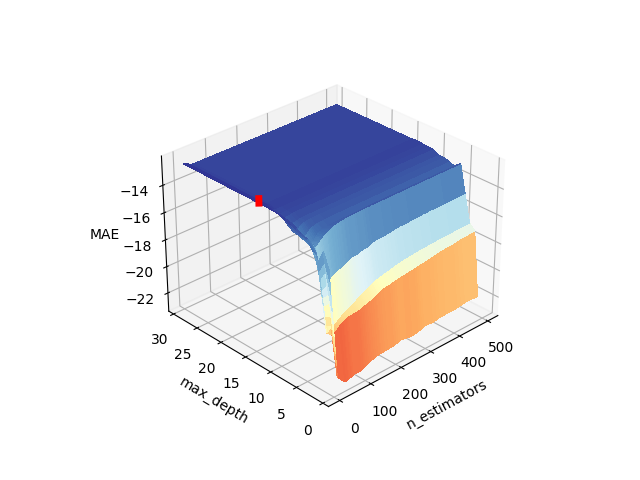

In [63]:
forestfires_comb4 = np.load("./np_arrays/forestfires_comb4.npy")
forestfires_comb4_zoom1, forestfires_comb4_zoom1_meshes  = np.load("./np_arrays_50/forestfires_comb4_zoom1.npy", allow_pickle=True)

'''
forestfires_comb2_zoom1_pack = zoom_2(forestfires_comb2, forestfires_comb2_m1, forestfires_comb2_m2,
                                   percentage=0.5, htype1="float", htype2="int", sort_dir="asc")
'''
forestfires_comb1_zoom1_pack = zoom_2(forestfires_comb4, forestfires_comb4_m1, forestfires_comb4_m2,
                                     percentage=0.5, htype1="int", htype2="int", sort_dir="asc")
forestfires_comb1_zoom1_lin1, forestfires_comb1_zoom1_lin2, forestfires_comb1_zoom1_m1, forestfires_comb1_zoom1_m2 = forestfires_comb1_zoom1_pack

n_estimators_temp = np.linspace(1, 500, 150, dtype=int)
max_depth_temp = np.linspace(1, 29, 150, dtype=int)

input_arrays = np.array([forestfires_comb4, forestfires_comb4_zoom1])
input_meshes = np.array([(forestfires_comb4_m1, forestfires_comb4_m2),
                        (forestfires_comb1_zoom1_m1, forestfires_comb1_zoom1_m2)])

forestfires_comb4_interp, forestfires_comb4_interp_m1, forestfires_comb4_interp_m2 = interpolate_lin(n_estimators_temp,
                                                                                                    max_depth_temp,
                                                                                                    input_arrays,
                                                                                                    input_meshes)

surface = 0 - forestfires_comb4_interp

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("n_estimators")
ax.set_ylabel("max_depth")
ax.set_zlabel("MAE")
surf = ax.plot_surface(forestfires_comb4_interp_m1, forestfires_comb4_interp_m2,
                       surface, 
                       cmap=cm.RdYlBu, linewidth=0, antialiased=False, rstride=1, cstride=1 )

x_axis, y_axis = np.where(surface == np.max(surface))

ax.plot([forestfires_comb4_interp_m1[x_axis[0], y_axis[0]],forestfires_comb4_interp_m1[x_axis[0], y_axis[0]]],
       [forestfires_comb4_interp_m2[x_axis[0], y_axis[0]], forestfires_comb4_interp_m2[x_axis[0], y_axis[0]]],
       [np.max(surface), np.max(surface - (np.max(surface)/40))], c="red", zorder=3.5, linewidth=5)

# wdbc

In [64]:
wdbc_learning_rate = np.linspace(0.0,2.0,20)
wdbc_n_estimators = np.linspace(1,500,20, dtype=int)
wdbc_max_depth = np.linspace(1,31,20, dtype=int)
wdbc_reg_lamda = np.linspace(0.0, 2.0, 20)

wdbc_ranges = (wdbc_learning_rate, wdbc_n_estimators, wdbc_max_depth,  wdbc_reg_lamda)

wdbc_meshes = generate_meshgrids(wdbc_ranges)

wdbc_comb1_m, wdbc_comb2_m, wdbc_comb3_m, wdbc_comb4_m, wdbc_comb5_m, wdbc_comb6_m = wdbc_meshes

wdbc_comb1_m1, wdbc_comb1_m2 = wdbc_comb1_m
wdbc_comb2_m1, wdbc_comb2_m2 = wdbc_comb2_m
wdbc_comb3_m1, wdbc_comb3_m2 = wdbc_comb3_m
wdbc_comb4_m1, wdbc_comb4_m2 = wdbc_comb4_m
wdbc_comb5_m1, wdbc_comb5_m2 = wdbc_comb5_m
wdbc_comb6_m1, wdbc_comb6_m2 = wdbc_comb6_m

## wdbc Comb 1

<ipython-input-65-ecd33a45fab1>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_arrays = np.array([wdbc_comb1, wdbc_comb1_zoom1])
<ipython-input-65-ecd33a45fab1>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_meshes = np.array([(wdbc_comb1_m1, wdbc_comb1_m2),


<IPython.core.display.Javascript object>


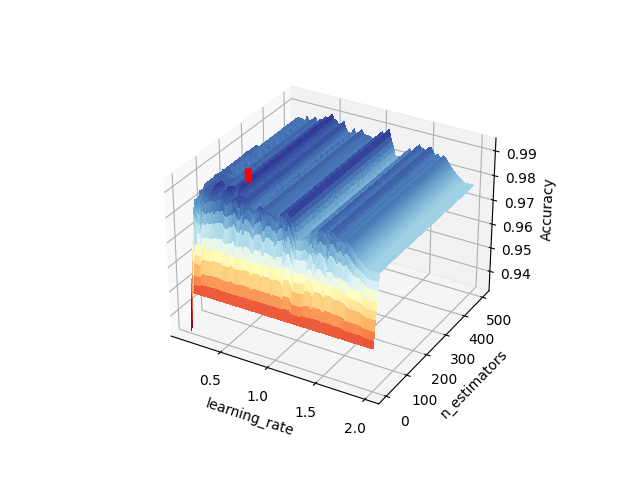

In [65]:
wdbc_comb1 = np.load("./np_arrays/wdbc_comb1.npy")
wdbc_comb1_zoom1, wdbc_comb1_zoom1_m = np.load("./np_arrays_50/wdbc_comb1_zoom1.npy", allow_pickle=True)

wdbc_comb1_zoom1_m1, wdbc_comb1_zoom1_m2 = comb_mesh(wdbc_comb1_zoom1_m, comb=1)

'''
wdbc_comb1_zoom1_pack = zoom_2(wdbc_comb1, wdbc_comb1_m1, wdbc_comb1_m2,
                              percentage=0.5, htype1="float", htype2="int", sort_dir="asc")
wdbc_comb1_zoom1_lin1, wdbc_comb1_zoom1_lin2, wdbc_comb1_zoom1_m1, wdbc_comb1_zoom1_m2 = wdbc_comb1_zoom1_pack
'''

learning_rate_temp = np.linspace(0.1, 2.0, 150)
n_estimators_temp = np.linspace(1, 500, 150, dtype=int)

input_arrays = np.array([wdbc_comb1, wdbc_comb1_zoom1])
input_meshes = np.array([(wdbc_comb1_m1, wdbc_comb1_m2),
                        (wdbc_comb1_zoom1_m1, wdbc_comb1_zoom1_m2)])

wdbc_comb1_interp, wdbc_comb1_interp_m1, wdbc_comb1_interp_m2 = interpolate_lin(learning_rate_temp, n_estimators_temp,
                                                                               input_arrays, input_meshes)

surface = wdbc_comb1_interp

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("learning_rate")
ax.set_ylabel("n_estimators")
ax.set_zlabel("Accuracy")
surf = ax.plot_surface(wdbc_comb1_interp_m1, wdbc_comb1_interp_m2,
                       surface, 
                       cmap=cm.RdYlBu, linewidth=0, antialiased=False, rstride=1, cstride=1 )

x_axis, y_axis = np.where(surface == np.max(surface))


ax.plot([wdbc_comb1_interp_m1[x_axis[0], y_axis[0]],wdbc_comb1_interp_m1[x_axis[0], y_axis[0]]],
       [wdbc_comb1_interp_m2[x_axis[0], y_axis[0]], wdbc_comb1_interp_m2[x_axis[0], y_axis[0]]],
       [np.max(surface), np.max(surface + (np.max(surface)/350))], c="red", zorder=3.5, linewidth=5)


## wdbc Comb 2

<ipython-input-66-e289ad2fda8d>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_arrays = np.array([wdbc_comb2, wdbc_comb2_zoom1])
<ipython-input-66-e289ad2fda8d>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_meshes = np.array([(wdbc_comb2_m1, wdbc_comb2_m2),


<IPython.core.display.Javascript object>


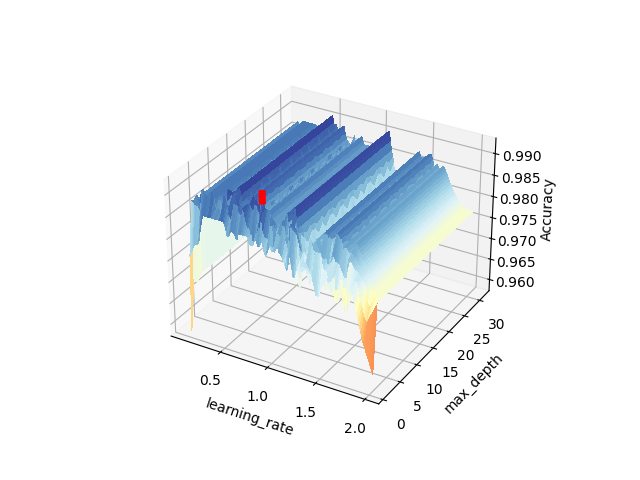

In [66]:
wdbc_comb2 = np.load("./np_arrays/wdbc_comb2.npy")
wdbc_comb2_zoom1, wdbc_comb2_zoom1_meshes  = np.load("./np_arrays_50/wdbc_comb2_zoom1.npy", allow_pickle=True)

wdbc_comb2_zoom1_m1, wdbc_comb2_zoom1_m2 = comb_mesh(wdbc_comb2_zoom1_meshes, comb=2)

'''
wdbc_comb2_zoom1_pack = zoom_2(wdbc_comb2, wdbc_comb2_m1, wdbc_comb2_m2,
                              percentage=0.5, htype1="float", htype2="int", sort_dir="asc")
wdbc_comb2_zoom1_lin1, wdbc_comb2_zoom1_lin2, wdbc_comb2_zoom1_m1, wdbc_comb2_zoom1_m2 = wdbc_comb2_zoom1_pack
'''

learning_rate_temp = np.linspace(0.1, 2.0, 150)
max_depth_temp = np.linspace(1,31,150, dtype=int)

input_arrays = np.array([wdbc_comb2, wdbc_comb2_zoom1])
input_meshes = np.array([(wdbc_comb2_m1, wdbc_comb2_m2),
                       (wdbc_comb2_zoom1_m1, wdbc_comb2_zoom1_m2)])

wdbc_comb2_interp, wdbc_comb2_interp_m1, wdbc_comb2_interp_m2 = interpolate_lin(learning_rate_temp, max_depth_temp,
                                                                               input_arrays, input_meshes)

surface = wdbc_comb2_interp

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("learning_rate")
ax.set_ylabel("max_depth")
ax.set_zlabel("Accuracy")
surf = ax.plot_surface(wdbc_comb2_interp_m1, wdbc_comb2_interp_m2,
                       surface, 
                       cmap=cm.RdYlBu, linewidth=0, antialiased=False, rstride=1, cstride=1)

x_axis, y_axis = np.where(surface == np.max(surface))

ax.plot([wdbc_comb2_interp_m1[x_axis[0], y_axis[0]],wdbc_comb2_interp_m1[x_axis[0], y_axis[0]]],
       [wdbc_comb2_interp_m2[x_axis[0], y_axis[0]], wdbc_comb2_interp_m2[x_axis[0], y_axis[0]]],
       [np.max(surface), np.max(surface + (np.max(surface)/600))], c="red", zorder=3.5, linewidth=5)

## wdbc Comb 4

<ipython-input-67-497bdff1bed4>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_arrays = np.array([wdbc_comb4, wdbc_comb4_zoom1])
<ipython-input-67-497bdff1bed4>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_meshes = np.array([(wdbc_comb4_m1, wdbc_comb4_m2),


<IPython.core.display.Javascript object>


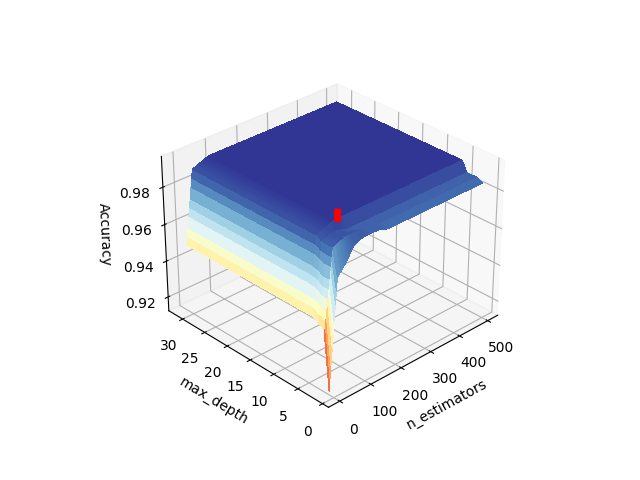

In [67]:
wdbc_comb4 = np.load("./np_arrays/wdbc_comb4.npy")
wdbc_comb4_zoom1, wdbc_comb4_zoom1_meshes = np.load("./np_arrays_50/wdbc_comb4_zoom1.npy", allow_pickle=True)

wdbc_comb4_zoom1_m1, wdbc_comb4_zoom1_m2 = comb_mesh(wdbc_comb4_zoom1_meshes, comb=4)

'''
wdbc_comb4_zoom1_pack = zoom_2(wdbc_comb4, wdbc_comb4_m1, wdbc_comb4_m2,
                              percentage=0.5, htype1="int", htype2="int", sort_dir="desc")
wdbc_comb4_zoom1_lin1, wdbc_comb4_zoom1_lin2, wdbc_comb4_zoom1_m1, wdbc_comb4_zoom1_m2 = wdbc_comb4_zoom1_pack
'''

n_estimators_temp = np.linspace(1, 500, 150, dtype=int)
max_depth_temp = np.linspace(1,31,150, dtype=int)

input_arrays = np.array([wdbc_comb4, wdbc_comb4_zoom1])
input_meshes = np.array([(wdbc_comb4_m1, wdbc_comb4_m2),
                       (wdbc_comb4_zoom1_m1, wdbc_comb4_zoom1_m2)])

wdbc_comb4_interp, wdbc_comb4_interp_m1, wdbc_comb4_interp_m2 = interpolate_lin(n_estimators_temp, max_depth_temp,
                                                                               input_arrays, input_meshes)

surface = wdbc_comb4_interp

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("n_estimators")
ax.set_ylabel("max_depth")
ax.set_zlabel("Accuracy")
surf = ax.plot_surface(wdbc_comb4_interp_m1, wdbc_comb4_interp_m2,
                       surface, 
                       cmap=cm.RdYlBu, linewidth=0, antialiased=False, rstride=1, cstride=1)

x_axis, y_axis = np.where(surface == np.max(surface))

ax.plot([wdbc_comb4_interp_m1[x_axis[0], y_axis[0]],wdbc_comb4_interp_m1[x_axis[0], y_axis[0]]],
       [wdbc_comb4_interp_m2[x_axis[0], y_axis[0]], wdbc_comb4_interp_m2[x_axis[0], y_axis[0]]],
       [np.max(surface), np.max(surface + (np.max(surface)/300))], c="red", zorder=3.5, linewidth=5)

# Biodeg

In [68]:
biodeg_learning_rate = np.linspace(0.0,2.0,20)
biodeg_n_estimators = np.linspace(1,500,20, dtype=int)
biodeg_max_depth = np.linspace(1,41,20, dtype=int)
biodeg_reg_lamda = np.linspace(0.0, 2.0, 20)

biodeg_ranges = (biodeg_learning_rate, biodeg_n_estimators, biodeg_max_depth, biodeg_reg_lamda)

biodeg_meshes = generate_meshgrids(biodeg_ranges)

biodeg_comb1_m, biodeg_comb2_m, biodeg_comb3_m, biodeg_comb4_m, biodeg_comb5_m, biodeg_comb6_m = biodeg_meshes

biodeg_comb1_m1, biodeg_comb1_m2 = biodeg_comb1_m
biodeg_comb2_m1, biodeg_comb2_m2 = biodeg_comb2_m
biodeg_comb3_m1, biodeg_comb3_m2 = biodeg_comb3_m
biodeg_comb4_m1, biodeg_comb4_m2 = biodeg_comb4_m
biodeg_comb5_m1, biodeg_comb5_m2 = biodeg_comb5_m
biodeg_comb6_m1, biodeg_comb6_m2 = biodeg_comb6_m

## Biodeg comb 1

<ipython-input-69-73fbd17cd22b>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_arrays = np.array([biodeg_comb1, biodeg_comb1_zoom1])
<ipython-input-69-73fbd17cd22b>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_meshes = np.array([(biodeg_comb1_m1, biodeg_comb1_m2),


<IPython.core.display.Javascript object>


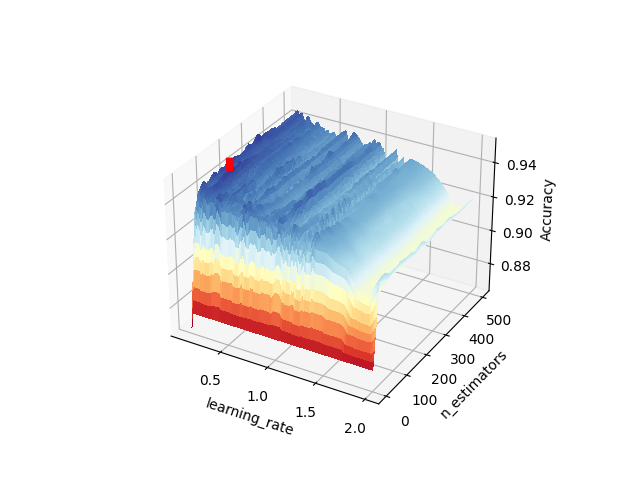

In [69]:
biodeg_comb1 = np.load("./np_arrays/biodeg_comb1.npy")
biodeg_comb1_zoom1, biodeg_comb1_zoom1_meshes = np.load("./np_arrays_50/biodeg_comb1_zoom1.npy", allow_pickle=True)

biodeg_comb1_zoom1_m1, biodeg_comb1_zoom1_m2 = comb_mesh(biodeg_comb1_zoom1_meshes, comb=1)

'''
biodeg_comb1_zoom1_pack = zoom_2(biodeg_comb1, biodeg_comb1_m1, biodeg_comb1_m2,
                                percentage=0.5, htype1="float", htype2="int", sort_dir="desc")
biodeg_comb1_zoom1_lin1, biodeg_comb1_zoom1_lin2, biodeg_comb1_zoom1_m1, biodeg_comb1_zoom1_m2 = biodeg_comb1_zoom1_pack
'''

learning_rate_temp = np.linspace(0.1, 2.0, 150)
n_estimators_temp = np.linspace(1, 500, 150, dtype=int)

input_arrays = np.array([biodeg_comb1, biodeg_comb1_zoom1])
input_meshes = np.array([(biodeg_comb1_m1, biodeg_comb1_m2),
                        (biodeg_comb1_zoom1_m1, biodeg_comb1_zoom1_m2)])

biodeg_comb1_interp, biodeg_comb1_interp_m1, biodeg_comb1_interp_m2 = interpolate_lin(learning_rate_temp, n_estimators_temp,
                                                                                     input_arrays, input_meshes)

surface = biodeg_comb1_interp

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("learning_rate")
ax.set_ylabel("n_estimators")
ax.set_zlabel("Accuracy")
surf = ax.plot_surface(biodeg_comb1_interp_m1, biodeg_comb1_interp_m2,
                       surface, 
                       cmap=cm.RdYlBu, linewidth=0, antialiased=False, rstride=1, cstride=1)

x_axis, y_axis = np.where(surface == np.max(surface))

ax.plot([biodeg_comb1_interp_m1[x_axis[0], y_axis[0]],biodeg_comb1_interp_m1[x_axis[0], y_axis[0]]],
       [biodeg_comb1_interp_m2[x_axis[0], y_axis[0]], biodeg_comb1_interp_m2[x_axis[0], y_axis[0]]],
       [np.max(surface), np.max(surface + (np.max(surface)/250))], c="red", zorder=3.5, linewidth=5)

## Biodeg Comb 2

<ipython-input-70-6c932e4fff32>:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_arrays = np.array([biodeg_comb2, biodeg_comb2_zoom1, biodeg_comb2_zoom2 ])
<ipython-input-70-6c932e4fff32>:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_meshes = np.array([(biodeg_comb2_m1, biodeg_comb2_m2),


<IPython.core.display.Javascript object>


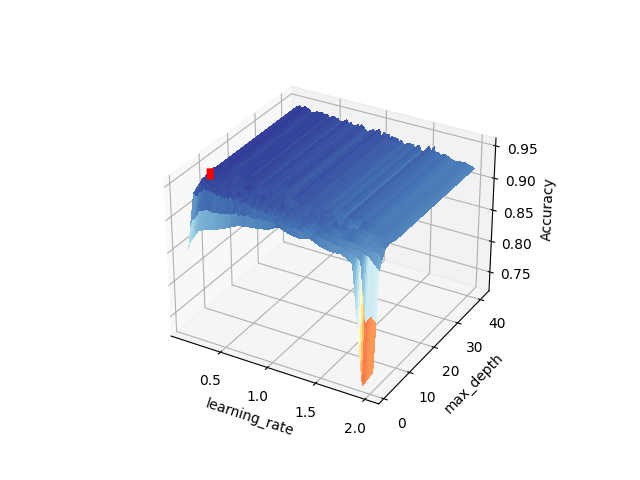

In [70]:
biodeg_comb2 = np.load("./np_arrays/biodeg_comb2.npy")
biodeg_comb2_zoom1, biodeg_comb2_zoom1_meshes = np.load("./np_arrays_50/biodeg_comb2_zoom1.npy", allow_pickle=True)
biodeg_comb2_zoom2, biodeg_comb2_zoom2_meshes = np.load("./np_arrays_50/biodeg_comb2_zoom2.npy", allow_pickle=True)

biodeg_comb2_zoom1_m1, biodeg_comb2_zoom1_m2 = comb_mesh(biodeg_comb2_zoom1_meshes, comb=2)
biodeg_comb2_zoom2_m1, biodeg_comb2_zoom2_m2 = comb_mesh(biodeg_comb2_zoom2_meshes, comb=2)

'''
biodeg_comb2_zoom1_pack = zoom_2(biodeg_comb2, biodeg_comb2_m1, biodeg_comb2_m2,
                                percentage=0.5, htype1="float", htype2="int", sort_dir="desc")
biodeg_comb2_zoom1_lin1, biodeg_comb2_zoom1_lin2, biodeg_comb2_zoom1_m1, biodeg_comb2_zoom1_m2 = biodeg_comb2_zoom1_pack

biodeg_comb2_zoom2_pack = zoom_2(biodeg_comb2_zoom1, biodeg_comb2_zoom1_m1, biodeg_comb2_zoom1_m2,
                                percentage=0.5, htype1="float", htype2="int", sort_dir="desc")
biodeg_comb2_zoom2_lin1, biodeg_comb2_zoom2_lin2, biodeg_comb2_zoom2_m1, biodeg_comb2_zoom2_m2 = biodeg_comb2_zoom2_pack
'''
learning_rate_temp = np.linspace(0.1, 2.0, 150)
max_depth_temp = np.linspace(1,41, 150, dtype=int)

input_arrays = np.array([biodeg_comb2, biodeg_comb2_zoom1, biodeg_comb2_zoom2 ])
input_meshes = np.array([(biodeg_comb2_m1, biodeg_comb2_m2), 
                         (biodeg_comb2_zoom1_m1, biodeg_comb2_zoom1_m2),
                         (biodeg_comb2_zoom2_m1, biodeg_comb2_zoom2_m2)])

biodeg_comb2_interp, biodeg_comb2_interp_m1, biodeg_comb2_interp_m2 = interpolate_lin(learning_rate_temp, max_depth_temp,
                                                                                     input_arrays, input_meshes)

surface = biodeg_comb2_interp

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("learning_rate")
ax.set_ylabel("max_depth")
ax.set_zlabel("Accuracy")
surf = ax.plot_surface(biodeg_comb2_interp_m1, biodeg_comb2_interp_m2,
                       surface, 
                       cmap=cm.RdYlBu, linewidth=0, antialiased=False, rstride=1, cstride=1)

x_axis, y_axis = np.where(surface == np.max(surface))

ax.plot([biodeg_comb2_interp_m1[x_axis[0], y_axis[0]],biodeg_comb2_interp_m1[x_axis[0], y_axis[0]]],
       [biodeg_comb2_interp_m2[x_axis[0], y_axis[0]], biodeg_comb2_interp_m2[x_axis[0], y_axis[0]]],
       [np.max(surface), np.max(surface + (np.max(surface)/150))], c="red", zorder=3.5, linewidth=5)

## Biodeg Comb 4

<ipython-input-71-9e13f2d9e772>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_arrays = np.array([biodeg_comb4, biodeg_comb4_zoom1])
<ipython-input-71-9e13f2d9e772>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_meshes = np.array([(biodeg_comb4_m1, biodeg_comb4_m2),


<IPython.core.display.Javascript object>


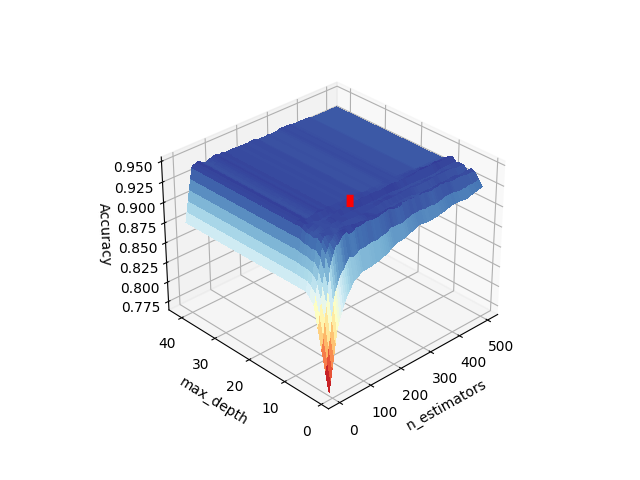

In [71]:
biodeg_comb4 = np.load("./np_arrays/biodeg_comb4.npy")
biodeg_comb4_zoom1, biodeg_comb4_zoom1_meshes = np.load("./np_arrays_50/biodeg_comb4_zoom1.npy", allow_pickle=True)

biodeg_comb4_zoom1_m1, biodeg_comb4_zoom1_m2 = comb_mesh(biodeg_comb4_zoom1_meshes, comb=4)


n_estimators_temp = np.linspace(1, 500, 100, dtype=int)
max_depth_temp = np.linspace(1,41, 100, dtype=int)

input_arrays = np.array([biodeg_comb4, biodeg_comb4_zoom1])
input_meshes = np.array([(biodeg_comb4_m1, biodeg_comb4_m2),
                        (biodeg_comb4_zoom1_m1, biodeg_comb4_zoom1_m2)])

biodeg_comb4_interp, biodeg_comb4_interp_m1, biodeg_comb4_interp_m2 = interpolate_lin(n_estimators_temp, max_depth_temp,
                                                                                     input_arrays, input_meshes)

surface = biodeg_comb4_interp

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("n_estimators")
ax.set_ylabel("max_depth")
ax.set_zlabel("Accuracy")
surf = ax.plot_surface(biodeg_comb4_interp_m1, biodeg_comb4_interp_m2,
                       surface, 
                       cmap=cm.RdYlBu, linewidth=0, antialiased=False, rstride=1, cstride=1)

x_axis, y_axis = np.where(surface == np.max(surface))

ax.plot([biodeg_comb4_interp_m1[x_axis[0], y_axis[0]],biodeg_comb4_interp_m1[x_axis[0], y_axis[0]]],
       [biodeg_comb4_interp_m2[x_axis[0], y_axis[0]], biodeg_comb4_interp_m2[x_axis[0], y_axis[0]]],
       [np.max(surface), np.max(surface + (np.max(surface)/150))], c="red", zorder=3.5, linewidth=5)

# Contraceptive

In [72]:
cmc_learning_rate = np.linspace(0.0,2.0,20)
cmc_n_estimators = np.linspace(1,500,20, dtype=int)
cmc_max_depth = np.linspace(1,9,20, dtype=int)
cmc_reg_lamda = np.linspace(0.0, 2.0, 20)

cmc_ranges = (cmc_learning_rate, cmc_n_estimators, cmc_max_depth, cmc_reg_lamda)

cmc_meshes = generate_meshgrids(cmc_ranges)

## Contraceptive Comb 1

<ipython-input-73-6b7bfc440c4a>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_arrays = np.array([cmc_comb1, cmc_comb1_zoom1])
<ipython-input-73-6b7bfc440c4a>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_meshes = np.array([(cmc_comb1_m1, cmc_comb1_m2),


<IPython.core.display.Javascript object>


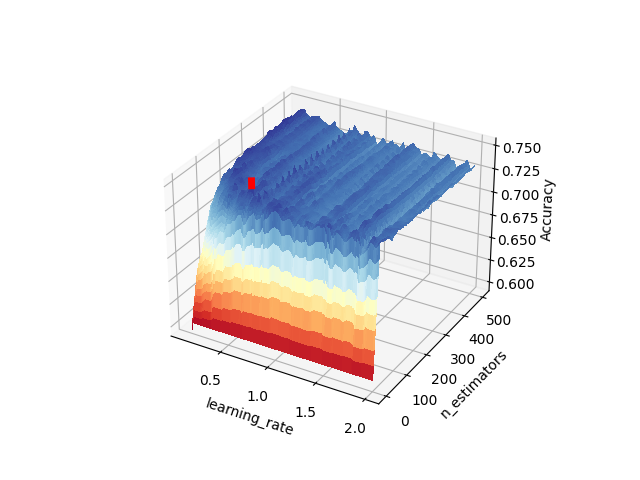

In [73]:
cmc_comb1 = np.load("./np_arrays/cmc_comb1.npy")
cmc_comb1_zoom1, cmc_comb1_zoom1_meshes = np.load("./np_arrays_50/cmc_comb1_zoom1.npy", allow_pickle=True)

cmc_comb1_m1, cmc_comb1_m2 = comb_mesh(cmc_meshes, comb = 1)
cmc_comb1_zoom1_m1, cmc_comb1_zoom1_m2 = comb_mesh(cmc_comb1_zoom1_meshes, comb=1)

learning_rate_temp = np.linspace(0.1,2.0,150)
n_estimators_temp = np.linspace(1,500,150, dtype=int)

input_arrays = np.array([cmc_comb1, cmc_comb1_zoom1])
input_meshes = np.array([(cmc_comb1_m1, cmc_comb1_m2),
                        (cmc_comb1_zoom1_m1, cmc_comb1_zoom1_m2)])

cmc_comb1_interp, cmc_comb1_interp_m1, cmc_comb1_interp_m2 = interpolate_lin(learning_rate_temp, n_estimators_temp,
                                                                            input_arrays, input_meshes)


surface = cmc_comb1_interp

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("learning_rate")
ax.set_ylabel("n_estimators")
ax.set_zlabel("Accuracy")
surf = ax.plot_surface(cmc_comb1_interp_m1, cmc_comb1_interp_m2,
                       surface, 
                       cmap=cm.RdYlBu, linewidth=0, antialiased=False, rstride=1, cstride=1)

x_axis, y_axis = np.where(surface == np.max(surface))

ax.plot([cmc_comb1_interp_m1[x_axis[0], y_axis[0]],cmc_comb1_interp_m1[x_axis[0], y_axis[0]]],
       [cmc_comb1_interp_m2[x_axis[0], y_axis[0]], cmc_comb1_interp_m2[x_axis[0], y_axis[0]]],
       [np.max(surface), np.max(surface + (np.max(surface)/150))], c="red", zorder=3.5, linewidth=5)

## Contraceptive Comb 2

<ipython-input-74-8c492023443e>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_arrays = np.array([cmc_comb2, cmc_comb2_zoom1])
<ipython-input-74-8c492023443e>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_meshes = np.array([(cmc_comb2_m1, cmc_comb2_m2),
<ipython-input-74-8c492023443e>:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.

<IPython.core.display.Javascript object>


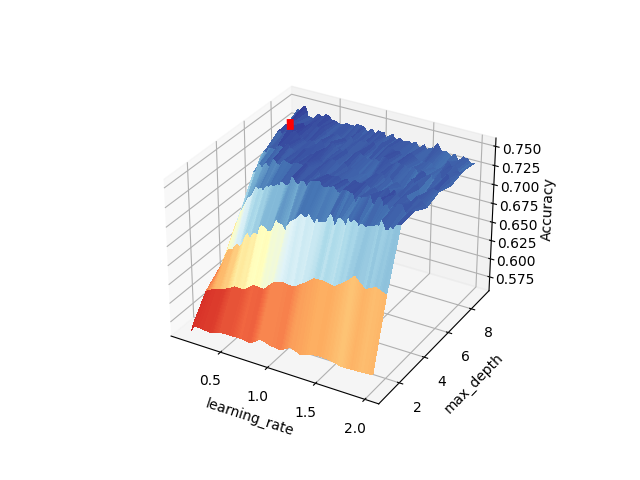

In [74]:
cmc_comb2 = np.load("./np_arrays/cmc_comb2.npy")
cmc_comb2_zoom1, cmc_comb2_zoom1_meshes = np.load("./np_arrays_50/cmc_comb2_zoom1.npy", allow_pickle=True)

cmc_comb2_m1, cmc_comb2_m2 = comb_mesh(cmc_meshes, comb = 2)
cmc_comb2_zoom1_m1, cmc_comb2_zoom1_m2 = comb_mesh(cmc_comb2_zoom1_meshes, comb=2)

learning_rate_temp = np.linspace(0.1,2.0,150)
max_depth_temp = np.linspace(1,9,150, dtype=int)

input_arrays = np.array([cmc_comb2, cmc_comb2_zoom1])
input_meshes = np.array([(cmc_comb2_m1, cmc_comb2_m2),
                        (cmc_comb2_zoom1_m1, cmc_comb2_zoom1_m2)])

cmc_comb2_interp, cmc_comb2_interp_m1, cmc_comb2_interp_m2 = interpolate_lin(learning_rate_temp, max_depth_temp,
                                                                            input_arrays, input_meshes)


surface = cmc_comb2_interp

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("learning_rate")
ax.set_ylabel("max_depth")
ax.set_zlabel("Accuracy")
surf = ax.plot_surface(cmc_comb2_interp_m1, cmc_comb2_interp_m2,
                       surface, 
                       cmap=cm.RdYlBu, linewidth=0, antialiased=False, rstride=1, cstride=1)

x_axis, y_axis = np.where(surface == np.max(surface))

ax.plot([cmc_comb2_interp_m1[x_axis[0], y_axis[0]],cmc_comb2_interp_m1[x_axis[0], y_axis[0]]],
       [cmc_comb2_interp_m2[x_axis[0], y_axis[0]], cmc_comb2_interp_m2[x_axis[0], y_axis[0]]],
       [np.max(surface), np.max(surface + (np.max(surface)/150))], c="red", zorder=3.5, linewidth=5)

## Contraceptive Comb 4

<ipython-input-75-8c451d4c3190>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_arrays = np.array([cmc_comb4, cmc_comb4_zoom1, cmc_comb4_zoom2])
<ipython-input-75-8c451d4c3190>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_meshes = np.array([(cmc_comb4_m1, cmc_comb4_m2),


<IPython.core.display.Javascript object>


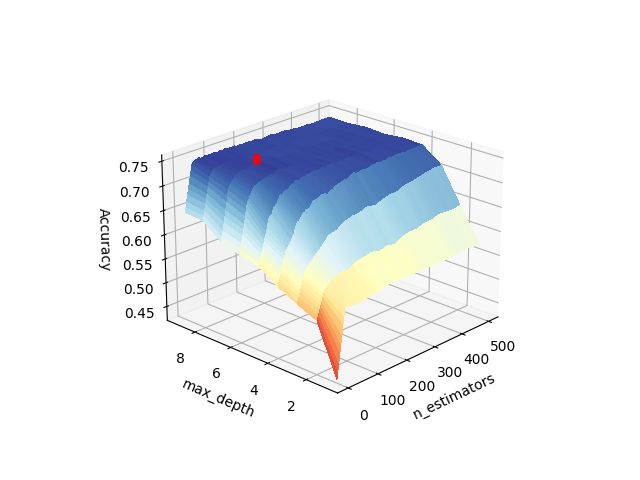

In [75]:
cmc_comb4 = np.load("./np_arrays/cmc_comb4.npy")
cmc_comb4_zoom1, cmc_comb4_zoom1_meshes = np.load("./np_arrays_50/cmc_comb4_zoom1.npy", allow_pickle=True)
cmc_comb4_zoom2, cmc_comb4_zoom2_meshes = np.load("./np_arrays_50/cmc_comb4_zoom2.npy", allow_pickle=True)

cmc_comb4_m1, cmc_comb4_m2 = comb_mesh(cmc_meshes, comb = 4)
cmc_comb4_zoom1_m1, cmc_comb4_zoom1_m2 = comb_mesh(cmc_comb4_zoom1_meshes, comb=4)
cmc_comb4_zoom2_m1, cmc_comb4_zoom2_m2 = comb_mesh(cmc_comb4_zoom2_meshes, comb=4)

n_estimators_temp = np.linspace(1,500,150, dtype=int)
max_depth_temp = np.linspace(1,9,150, dtype=int)

input_arrays = np.array([cmc_comb4, cmc_comb4_zoom1, cmc_comb4_zoom2])
input_meshes = np.array([(cmc_comb4_m1, cmc_comb4_m2),
                        (cmc_comb4_zoom1_m1, cmc_comb4_zoom1_m2),
                        (cmc_comb4_zoom2_m1, cmc_comb4_zoom2_m2)])

cmc_comb4_interp, cmc_comb4_interp_m1, cmc_comb4_interp_m2 = interpolate_lin(n_estimators_temp, max_depth_temp,
                                                                            input_arrays, input_meshes)


surface = cmc_comb4_interp

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("n_estimators")
ax.set_ylabel("max_depth")
ax.set_zlabel("Accuracy")
surf = ax.plot_surface(cmc_comb4_interp_m1, cmc_comb4_interp_m2,
                       surface, 
                       cmap=cm.RdYlBu, linewidth=0, antialiased=False, rstride=1, cstride=1)

x_axis, y_axis = np.where(surface == np.max(surface))

ax.plot([cmc_comb4_interp_m1[x_axis[0], y_axis[0]],cmc_comb4_interp_m1[x_axis[0], y_axis[0]]],
       [cmc_comb4_interp_m2[x_axis[0], y_axis[0]], cmc_comb4_interp_m2[x_axis[0], y_axis[0]]],
       [np.max(surface), np.max(surface + (np.max(surface)/130))], c="red", zorder=3.5, linewidth=5)

# Winer

In [76]:
winer_learning_rate = np.linspace(0.0,2.0,20)
winer_n_estimators = np.linspace(1,500,20, dtype=int)
winer_max_depth = np.linspace(1,11,20, dtype=int)
winer_reg_lamda = np.linspace(0.0, 2.0, 20)

winer_ranges = (winer_learning_rate, winer_n_estimators, winer_max_depth, winer_reg_lamda)

winer_meshes = generate_meshgrids(winer_ranges)

## Winer Comb 1

<ipython-input-78-a0c0bf588f28>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_arrays = np.array([winer_comb1, winer_comb1_zoom1])
<ipython-input-78-a0c0bf588f28>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_meshes = np.array([(winer_comb1_m1, winer_comb1_m2),


<IPython.core.display.Javascript object>


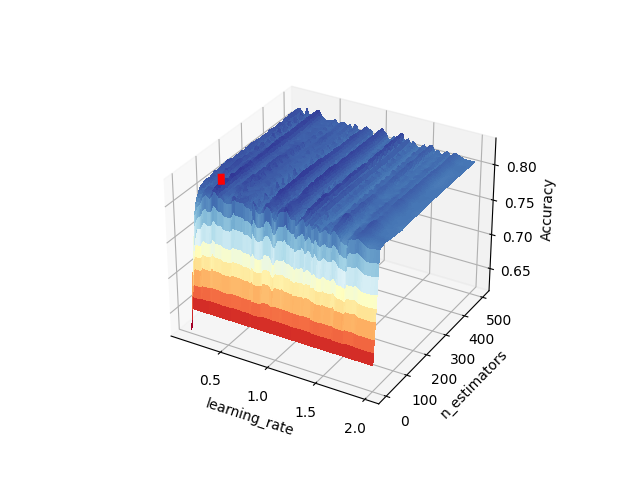

In [78]:

winer_comb1 = np.load("./np_arrays/winer_comb1.npy")
winer_comb1_zoom1, winer_comb1_zoom1_meshes = np.load("./np_arrays_50/winer_comb1_zoom1.npy", allow_pickle=True)

winer_comb1_m1, winer_comb1_m2 = comb_mesh(winer_meshes, comb=1)
winer_comb1_zoom1_m1, winer_comb1_zoom1_m2 = comb_mesh(winer_comb1_zoom1_meshes, comb=1)

learning_rate_temp = np.linspace(0.1,2.0,150)
n_estimators_temp = np.linspace(1,500,150, dtype=int)

input_arrays = np.array([winer_comb1, winer_comb1_zoom1])
input_meshes = np.array([(winer_comb1_m1, winer_comb1_m2),
                        (winer_comb1_zoom1_m1, winer_comb1_zoom1_m2)])

winer_comb1_interp, winer_comb1_interp_m1, winer_comb1_interp_m2 = interpolate_lin(learning_rate_temp, n_estimators_temp,
                                                                                  input_arrays, input_meshes)

surface = winer_comb1_interp

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("learning_rate")
ax.set_ylabel("n_estimators")
ax.set_zlabel("Accuracy")
surf = ax.plot_surface(winer_comb1_interp_m1, winer_comb1_interp_m2,
                       surface, 
                       cmap=cm.RdYlBu, linewidth=0, antialiased=False, rstride=1, cstride=1)

x_axis, y_axis = np.where(surface == np.max(surface))

ax.plot([winer_comb1_interp_m1[x_axis[0], y_axis[0]],winer_comb1_interp_m1[x_axis[0], y_axis[0]]],
       [winer_comb1_interp_m2[x_axis[0], y_axis[0]], winer_comb1_interp_m2[x_axis[0], y_axis[0]]],
       [np.max(surface), np.max(surface + (np.max(surface)/150))], c="red", zorder=3.5, linewidth=5)

## Winer Comb 2

<ipython-input-79-89879f4a1b1e>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_arrays = np.array([winer_comb2, winer_comb2_zoom1, winer_comb2_zoom2])
<ipython-input-79-89879f4a1b1e>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_meshes = np.array([(winer_comb2_m1, winer_comb2_m2),


<IPython.core.display.Javascript object>


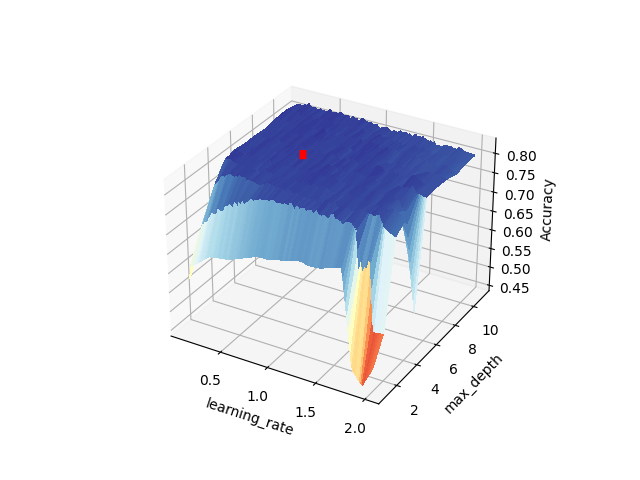

In [79]:
winer_comb2 = np.load("./np_arrays/winer_comb2.npy")
winer_comb2_zoom1, winer_comb2_zoom1_meshes = np.load("./np_arrays_50/winer_comb2_zoom1.npy", allow_pickle=True)
winer_comb2_zoom2, winer_comb2_zoom2_meshes = np.load("./np_arrays_50/winer_comb2_zoom2.npy", allow_pickle=True)

winer_comb2_m1, winer_comb2_m2 = comb_mesh(winer_meshes, comb=2)
winer_comb2_zoom1_m1, winer_comb2_zoom1_m2 = comb_mesh(winer_comb2_zoom1_meshes, comb=2)
winer_comb2_zoom2_m, winer_comb2_zoom2_m2 = comb_mesh(winer_comb2_zoom2_meshes, comb=2)

learning_rate_temp = np.linspace(0.1,2.0,150)
max_depth_temp = np.linspace(1,11,150, dtype=int)

input_arrays = np.array([winer_comb2, winer_comb2_zoom1, winer_comb2_zoom2])
input_meshes = np.array([(winer_comb2_m1, winer_comb2_m2),
                        (winer_comb2_zoom1_m1, winer_comb2_zoom1_m2),
                        (winer_comb2_zoom2_m, winer_comb2_zoom2_m2)])

winer_comb2_interp, winer_comb2_interp_m1, winer_comb2_interp_m2 = interpolate_lin(learning_rate_temp, max_depth_temp,
                                                                                  input_arrays, input_meshes)

surface = winer_comb2_interp

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("learning_rate")
ax.set_ylabel("max_depth")
ax.set_zlabel("Accuracy")
surf = ax.plot_surface(winer_comb2_interp_m1, winer_comb2_interp_m2,
                       surface, 
                       cmap=cm.RdYlBu, linewidth=0, antialiased=False, rstride=1, cstride=1)

x_axis, y_axis = np.where(surface == np.max(surface))

ax.plot([winer_comb2_interp_m1[x_axis[0], y_axis[0]],winer_comb2_interp_m1[x_axis[0], y_axis[0]]],
       [winer_comb2_interp_m2[x_axis[0], y_axis[0]], winer_comb2_interp_m2[x_axis[0], y_axis[0]]],
       [np.max(surface), np.max(surface + (np.max(surface)/150))], c="red", zorder=3.5, linewidth=5)

## Winer Comb 4

<ipython-input-80-26d2e819de08>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_arrays = np.array([winer_comb4, winer_comb4_zoom1])
<ipython-input-80-26d2e819de08>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_meshes = np.array([(winer_comb4_m1, winer_comb4_m2),


<IPython.core.display.Javascript object>


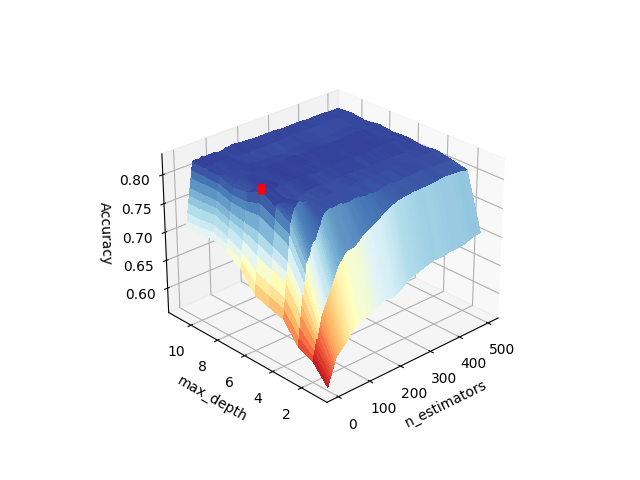

In [80]:
winer_comb4 = np.load("./np_arrays/winer_comb4.npy")
winer_comb4_zoom1, winer_comb4_zoom1_meshes = np.load("./np_arrays_50/winer_comb4_zoom1.npy", allow_pickle=True)


winer_comb4_m1, winer_comb4_m2 = comb_mesh(winer_meshes, comb=4)
winer_comb4_zoom1_m1, winer_comb4_zoom1_m2 = comb_mesh(winer_comb4_zoom1_meshes, comb=4)


n_estimators_temp = np.linspace(1,500,150, dtype=int)
max_depth_temp = np.linspace(1,11,150, dtype=int)

input_arrays = np.array([winer_comb4, winer_comb4_zoom1])
input_meshes = np.array([(winer_comb4_m1, winer_comb4_m2),
                        (winer_comb4_zoom1_m1, winer_comb4_zoom1_m2)])

winer_comb4_interp, winer_comb4_interp_m1, winer_comb4_interp_m2 = interpolate_lin(n_estimators_temp, max_depth_temp,
                                                                                  input_arrays, input_meshes)

surface = winer_comb4_interp

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("n_estimators")
ax.set_ylabel("max_depth")
ax.set_zlabel("Accuracy")
surf = ax.plot_surface(winer_comb4_interp_m1, winer_comb4_interp_m2,
                       surface, 
                       cmap=cm.RdYlBu, linewidth=0, antialiased=False, rstride=1, cstride=1)

x_axis, y_axis = np.where(surface == np.max(surface))

ax.plot([winer_comb4_interp_m1[x_axis[0], y_axis[0]],winer_comb4_interp_m1[x_axis[0], y_axis[0]]],
       [winer_comb4_interp_m2[x_axis[0], y_axis[0]], winer_comb4_interp_m2[x_axis[0], y_axis[0]]],
       [np.max(surface), np.max(surface + (np.max(surface)/150))], c="red", zorder=3.5, linewidth=5)

# auto-mpg

In [81]:

auto_learning_rate = np.linspace(0.0,2.0,20)
auto_n_estimators = np.linspace(1,500,20, dtype=int)
auto_max_depth = np.linspace(1, 7, 20, dtype=int)
auto_reg_lamda = np.linspace(0.0, 2.0, 20)

auto_ranges = (auto_learning_rate, auto_n_estimators, auto_max_depth, auto_reg_lamda)

auto_meshes = generate_meshgrids(auto_ranges)

## auto-mpg Comb 1

<ipython-input-82-f31bfb3fffc2>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_arrays = np.array([auto_comb1, auto_comb1_zoom1, auto_comb1_zoom2, auto_comb1_zoom3, auto_comb1_zoom4])
<ipython-input-82-f31bfb3fffc2>:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_meshes = np.array([(auto_comb1_m1, auto_comb1_m2),


<IPython.core.display.Javascript object>


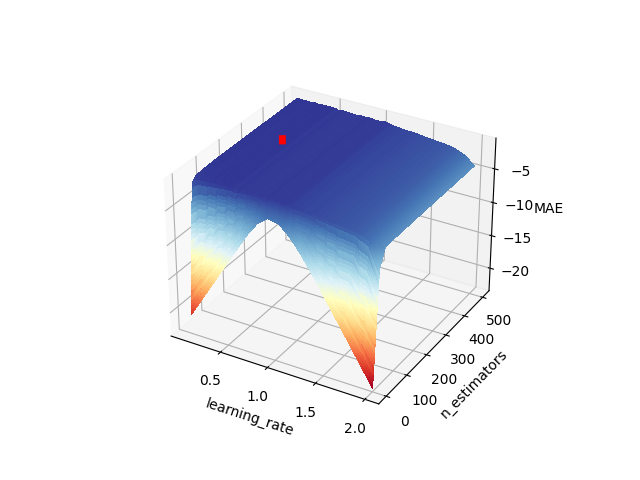

In [82]:


auto_comb1 = np.load("./np_arrays/auto_comb1.npy")
auto_comb1_zoom1, auto_comb1_zoom1_meshes = np.load("./np_arrays_50/auto_comb1_zoom1.npy", allow_pickle=True)
auto_comb1_zoom2, auto_comb1_zoom2_meshes = np.load("./np_arrays_50/auto_comb1_zoom2.npy", allow_pickle=True)
auto_comb1_zoom3, auto_comb1_zoom3_meshes = np.load("./np_arrays_50/auto_comb1_zoom3.npy", allow_pickle=True)
auto_comb1_zoom4, auto_comb1_zoom4_meshes = np.load("./np_arrays_50/auto_comb1_zoom4.npy", allow_pickle=True)

auto_comb1_m1, auto_comb1_m2 = comb_mesh(auto_meshes, comb=1)
auto_comb1_zoom1_m1, auto_comb1_zoom1_m2 = comb_mesh(auto_comb1_zoom1_meshes, comb=1)
auto_comb1_zoom2_m1, auto_comb1_zoom2_m2 = comb_mesh(auto_comb1_zoom2_meshes, comb=1)
auto_comb1_zoom3_m1, auto_comb1_zoom3_m2 = comb_mesh(auto_comb1_zoom3_meshes, comb=1)
auto_comb1_zoom4_m1, auto_comb1_zoom4_m2 = comb_mesh(auto_comb1_zoom4_meshes, comb=1)

learning_rate_temp = np.linspace(0.1,2.0,400)
n_estimators_temp = np.linspace(1,500,400, dtype=int)

input_arrays = np.array([auto_comb1, auto_comb1_zoom1, auto_comb1_zoom2, auto_comb1_zoom3, auto_comb1_zoom4])
input_meshes = np.array([(auto_comb1_m1, auto_comb1_m2),
                        (auto_comb1_zoom1_m1, auto_comb1_zoom1_m2),
                        (auto_comb1_zoom2_m1, auto_comb1_zoom2_m2),
                        (auto_comb1_zoom3_m1, auto_comb1_zoom3_m2),
                        (auto_comb1_zoom4_m1, auto_comb1_zoom4_m2 )])

auto_comb1_interp, auto_comb1_interp_m1, auto_comb1_interp_m2 = interpolate_lin(learning_rate_temp, n_estimators_temp,
                                                                               input_arrays, input_meshes)

surface = 0 - auto_comb1_interp

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("learning_rate")
ax.set_ylabel("n_estimators")
ax.set_zlabel("MAE")
surf = ax.plot_surface(auto_comb1_interp_m1, auto_comb1_interp_m2,
                       surface, 
                       cmap=cm.RdYlBu, linewidth=0, antialiased=False, rstride=1, cstride=1)

x_axis, y_axis = np.where(surface == np.max(surface))

ax.plot([auto_comb1_interp_m1[x_axis[0], y_axis[0]],auto_comb1_interp_m1[x_axis[0], y_axis[0]]],
       [auto_comb1_interp_m2[x_axis[0], y_axis[0]], auto_comb1_interp_m2[x_axis[0], y_axis[0]]],
       [np.max(surface), np.max(surface + (np.max(surface)/3))], c="red", zorder=3.5, linewidth=5)

## auto-mpg Comb 2

<ipython-input-83-68be267a989f>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_arrays = np.array([auto_comb2, auto_comb2_zoom1, auto_comb2_zoom2, auto_comb2_zoom3, auto_comb2_zoom4])
<ipython-input-83-68be267a989f>:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_meshes = np.array([(auto_comb2_m1, auto_comb2_m2),


<IPython.core.display.Javascript object>


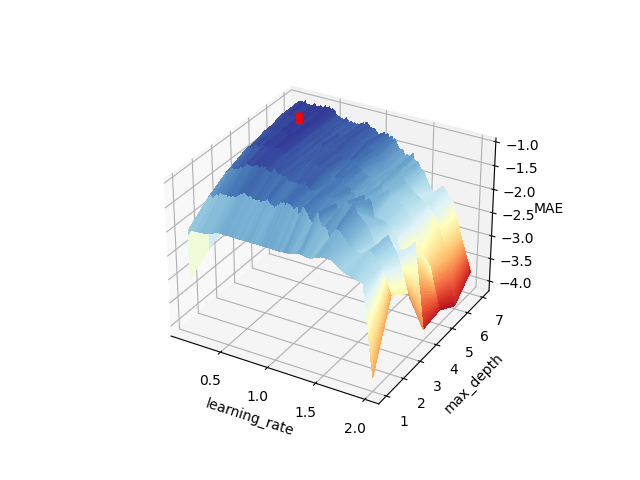

In [83]:


auto_comb2 = np.load("./np_arrays/auto_comb2.npy")
auto_comb2_zoom1, auto_comb2_zoom1_meshes = np.load("./np_arrays_50/auto_comb2_zoom1.npy", allow_pickle=True)
auto_comb2_zoom2, auto_comb2_zoom2_meshes = np.load("./np_arrays_50/auto_comb2_zoom2.npy", allow_pickle=True)
auto_comb2_zoom3, auto_comb2_zoom3_meshes = np.load("./np_arrays_50/auto_comb2_zoom3.npy", allow_pickle=True)
auto_comb2_zoom4, auto_comb2_zoom4_meshes = np.load("./np_arrays_50/auto_comb2_zoom4.npy", allow_pickle=True)

auto_comb2_m1, auto_comb2_m2 = comb_mesh(auto_meshes, comb=2)
auto_comb2_zoom1_m1, auto_comb2_zoom1_m2 = comb_mesh(auto_comb2_zoom1_meshes, comb=2)
auto_comb2_zoom2_m1, auto_comb2_zoom2_m2 = comb_mesh(auto_comb2_zoom2_meshes, comb=2)
auto_comb2_zoom3_m1, auto_comb2_zoom3_m2 = comb_mesh(auto_comb2_zoom3_meshes, comb=2)
auto_comb2_zoom4_m1, auto_comb2_zoom4_m2 = comb_mesh(auto_comb2_zoom4_meshes, comb=2)

learning_rate_temp = np.linspace(0.1,2.0,400)
max_depth_temp = np.linspace(1, 7, 400, dtype=int)

input_arrays = np.array([auto_comb2, auto_comb2_zoom1, auto_comb2_zoom2, auto_comb2_zoom3, auto_comb2_zoom4])
input_meshes = np.array([(auto_comb2_m1, auto_comb2_m2),
                        (auto_comb2_zoom1_m1, auto_comb2_zoom1_m2),
                        (auto_comb2_zoom2_m1, auto_comb2_zoom2_m2),
                        (auto_comb2_zoom3_m1, auto_comb2_zoom3_m2),
                        (auto_comb2_zoom4_m1, auto_comb2_zoom4_m2)])

auto_comb2_interp, auto_comb2_interp_m1, auto_comb2_interp_m2 = interpolate_lin(learning_rate_temp, max_depth_temp,
                                                                               input_arrays, input_meshes)

surface = 0 - auto_comb2_interp

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("learning_rate")
ax.set_ylabel("max_depth")
ax.set_zlabel("MAE")
surf = ax.plot_surface(auto_comb2_interp_m1, auto_comb2_interp_m2,
                       surface, 
                       cmap=cm.RdYlBu, linewidth=0, antialiased=False, rstride=1, cstride=1)

x_axis, y_axis = np.where(surface == np.max(surface))

ax.plot([auto_comb2_interp_m1[x_axis[0], y_axis[0]],auto_comb2_interp_m1[x_axis[0], y_axis[0]]],
       [auto_comb2_interp_m2[x_axis[0], y_axis[0]], auto_comb2_interp_m2[x_axis[0], y_axis[0]]],
       [np.max(surface), np.max(surface + (np.max(surface)/10))], c="red", zorder=3.5, linewidth=5)

## auto-mpg Comb 4

<ipython-input-84-09ef27c6ef2b>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_arrays = np.array([auto_comb4, auto_comb4_zoom1])
<ipython-input-84-09ef27c6ef2b>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_meshes = np.array([(auto_comb4_m1, auto_comb4_m2),


<IPython.core.display.Javascript object>


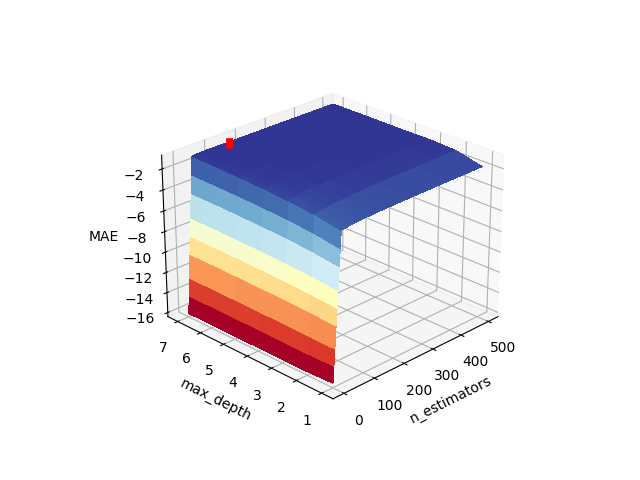

In [84]:
auto_comb4 = np.load("./np_arrays/auto_comb4.npy")
auto_comb4_zoom1, auto_comb4_zoom1_meshes = np.load("./np_arrays_50/auto_comb4_zoom1.npy", allow_pickle=True)


auto_comb4_m1, auto_comb4_m2 = comb_mesh(auto_meshes, comb=4)
auto_comb4_zoom1_m1, auto_comb4_zoom1_m2 = comb_mesh(auto_comb4_zoom1_meshes, comb=4)


n_estimators_temp = np.linspace(1,500,150, dtype=int)
max_depth_temp = np.linspace(1, 7, 150, dtype=int)

input_arrays = np.array([auto_comb4, auto_comb4_zoom1])
input_meshes = np.array([(auto_comb4_m1, auto_comb4_m2),
                        (auto_comb4_zoom1_m1, auto_comb4_zoom1_m2)])

auto_comb4_interp, auto_comb4_interp_m1, auto_comb4_interp_m2 = interpolate_lin(n_estimators_temp, max_depth_temp,
                                                                               input_arrays, input_meshes)

surface = 0 - auto_comb4_interp

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("n_estimators")
ax.set_ylabel("max_depth")
ax.set_zlabel("MAE")
surf = ax.plot_surface(auto_comb4_interp_m1, auto_comb4_interp_m2,
                       surface, 
                       cmap=cm.RdYlBu, linewidth=0, antialiased=False, rstride=1, cstride=1)

x_axis, y_axis = np.where(surface == np.max(surface))

ax.plot([auto_comb4_interp_m1[x_axis[0], y_axis[0]],auto_comb4_interp_m1[x_axis[0], y_axis[0]]],
       [auto_comb4_interp_m2[x_axis[0], y_axis[0]], auto_comb4_interp_m2[x_axis[0], y_axis[0]]],
       [np.max(surface), np.max(surface + (np.max(surface)/3))], c="red", zorder=3.5, linewidth=5)

In [140]:
blyet = np.array([[1], [3]])

In [142]:
if np.array([1]).tolist() not in blyet.tolist():
    print("mmmm")